# Heart Disease Prediction

## Team Members
Ahmet Erden - erden18@itu.edu.tr - 090190743 <br>
Samet Saydam - saydam18@itu.edu.tr - 090210726 <br>
Utku Sert - sertu18@itu.edu.tr - 090210729 <br>

## Table of Contents
1. Introduction:<br><br>
    Goal<br><br>
    Dataset Information<br><br><br>
    
2. Attribute Plotting and Analysis<br><br><br>
3. Model Constructing <br><br>
    3.1 Preapering data to model with dropping invalid values and outliers<br><br>
    3.2 Preapering data to model with interpolation<br><br><br>
4. Deciding best model and conclusion    

## 1. Introduction <br>
### Goal
In this project, we will analyze the Heart Disease dataset in the best way and compare which model gives the most accurate results by using the machine learning algorithms. Since the machine learning plays an important role in diagnosing diseases, we aim to predict patients with heart disease correctly. Conditions that affect the heart are called hearth disease. Heart disease can be caused by various reasons. we will investigate these by using our attributes of the dataset and decide which features are most important. Logistic Regression, K-nearest Neighbour, Support Vector Machine and Random Forest are the models that we will try to get high accuracy with best parameters. We know Neural Network models gives the best result, but we will try to reach high accuracy with these models since Neural Network models are expensive. We also test our models with confusion matrix, classification report and cross validitation. At the end of project, all of the models (our models and other models) will be compared and the best model will be decided. <br>

### Dataset information
[Dataset Link](https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive#9)<br>
This heart disease dataset is result of combination of five popular heart disease dataset(Cleveland, Hungarian, Switzerland, Long Beach VA, Statlog (Heart)) over 11 common attributes.<br>
1-Age (Numeric)<br>
2-Sex (Binary). 1 = male, 0 = female<br>
3-Chest Pain Type (Nominal)<br> 
There is various chest pain types. In our dataset, there are 4 types:<br>
Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic<br>
4-Resting Blood Pressure (Numeric)  
5-Serum Cholesterol (Numeric)<br>
6-Fasting Blood Sugar (Binary).
If greater than 120 mg/dl, its corresponding boolean value is 1. Else it is 0.<br>
7-Resting Electrocardiogram Results (Nominal)<br>
0 = normal, 1 = having ST-T wave abnormality, 2 = having probable or definite left ventricular hypertrophy by Estes' criteria<br>
8-Maximum Heart Rate Achieved (Numeric)<br>
9-Exercise Induced Angina (Binary). 1 = yes, 0 = no<br>
10-Oldpeak = ST (Numeric)<br>
11-The Slope of the Peak Exercise ST Segment (Nominal). 1 = upsloping, 2 = flat, 3 = downsloping<br>
12-Target (Binary). 1 = have heart disease, 0 = not have heart disease.<br>

## 2. Attribute Plotting and Analysis

In [190]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [191]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [192]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

There is no 'Nan' data.

In [193]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

We do not need encoding beacuse the dataset has been already encoded for categorical features.

In [195]:
df.nunique(axis=0)

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

Note: 'ST slope' must have 3 unique values according to dataset documentation. Since we dont have 'Nan' value, there must be different value that is not valid. We will handle it below.

In [196]:
df.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

Note:'cholesterol' have value/s that is/are 0 which is also not valid like 'ST slope' having '0' value/s.

### Analysis of People Having Heart Disease

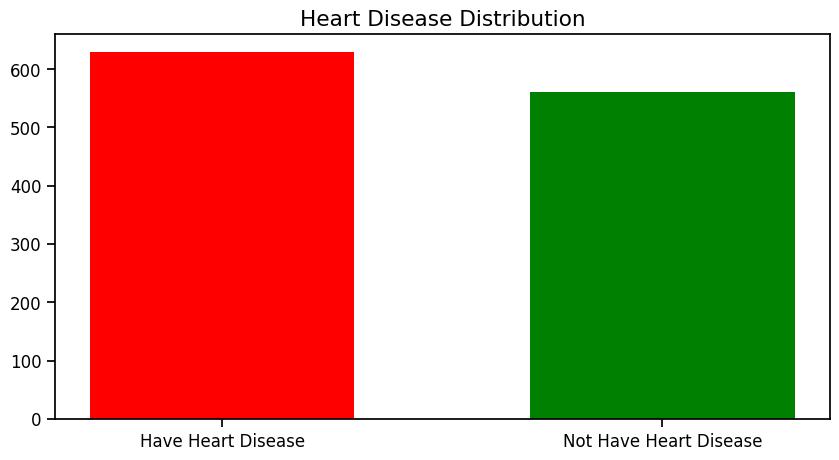

In [197]:
plt.figure(figsize=(10, 5))
plt.bar(['Have Heart Disease','Not Have Heart Disease'] ,df['target'].value_counts(),color=['red','green'], width=0.6)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Heart Disease Distribution")
plt.show()

In [8]:
print("1 = Have Heart Disease, 0 = Not Have Heart Disease")
df.target.value_counts()

1 = Have Heart Disease, 0 = Not Have Heart Disease


1    629
0    561
Name: target, dtype: int64

Distribution of target variables in dataset is balanced.

### Age Analysis

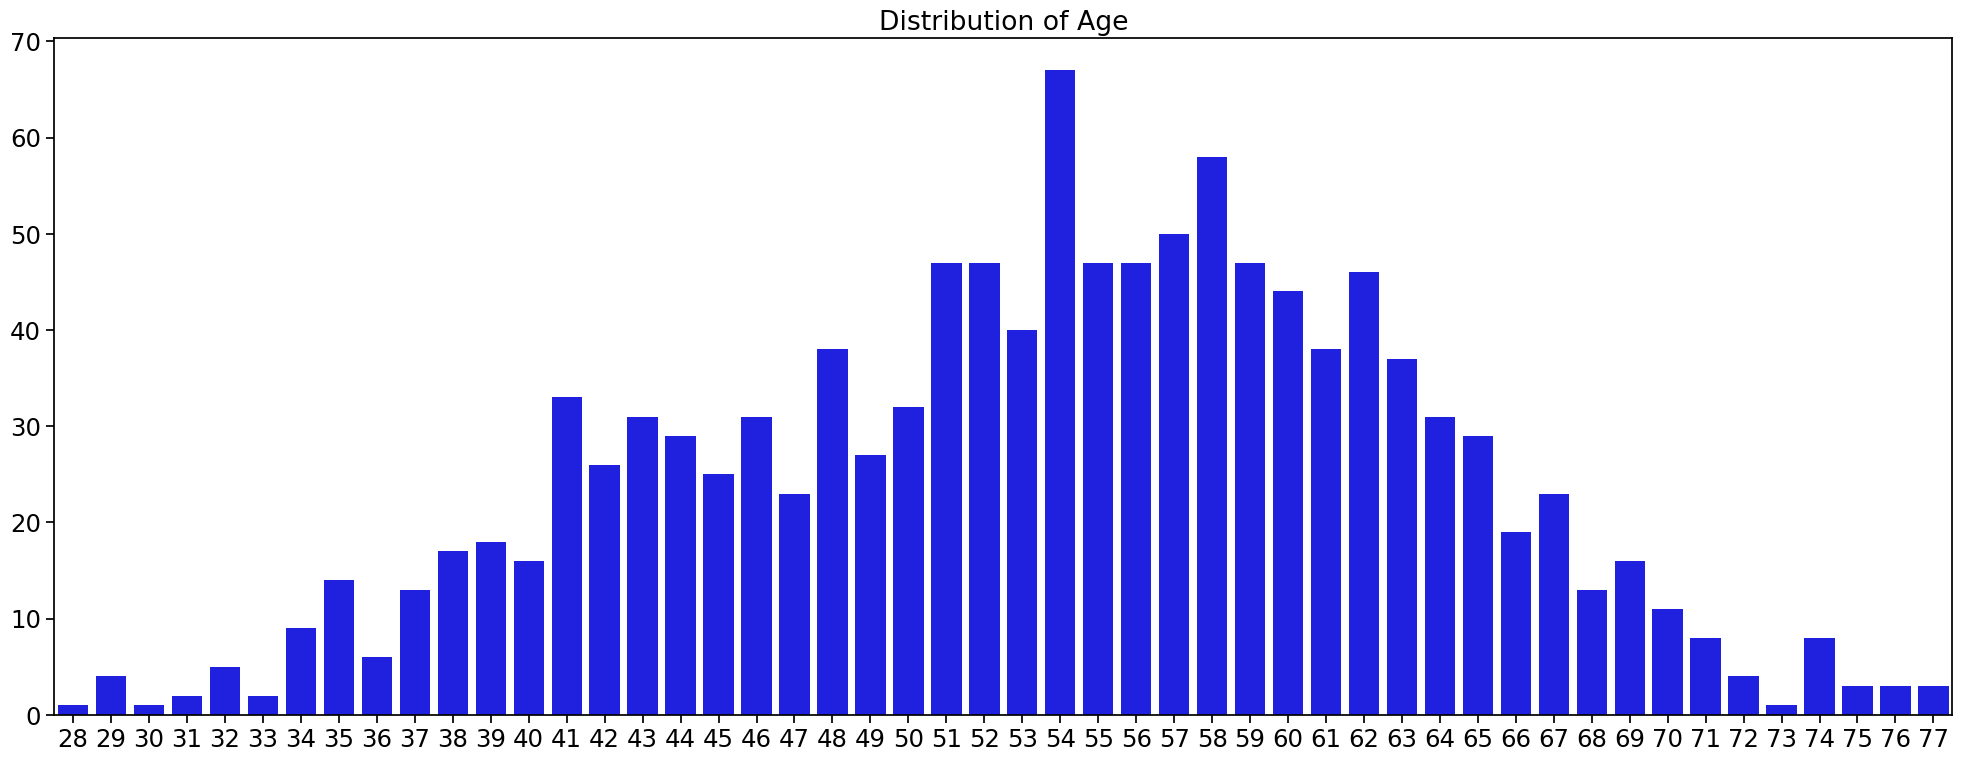

In [9]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.6)
sns.barplot(x=df.age.value_counts().index,y=df.age.value_counts().values, color = 'blue')
plt.title("Distribution of Age")
plt.tight_layout()

Most of the our datas is consist of middle-aged people.

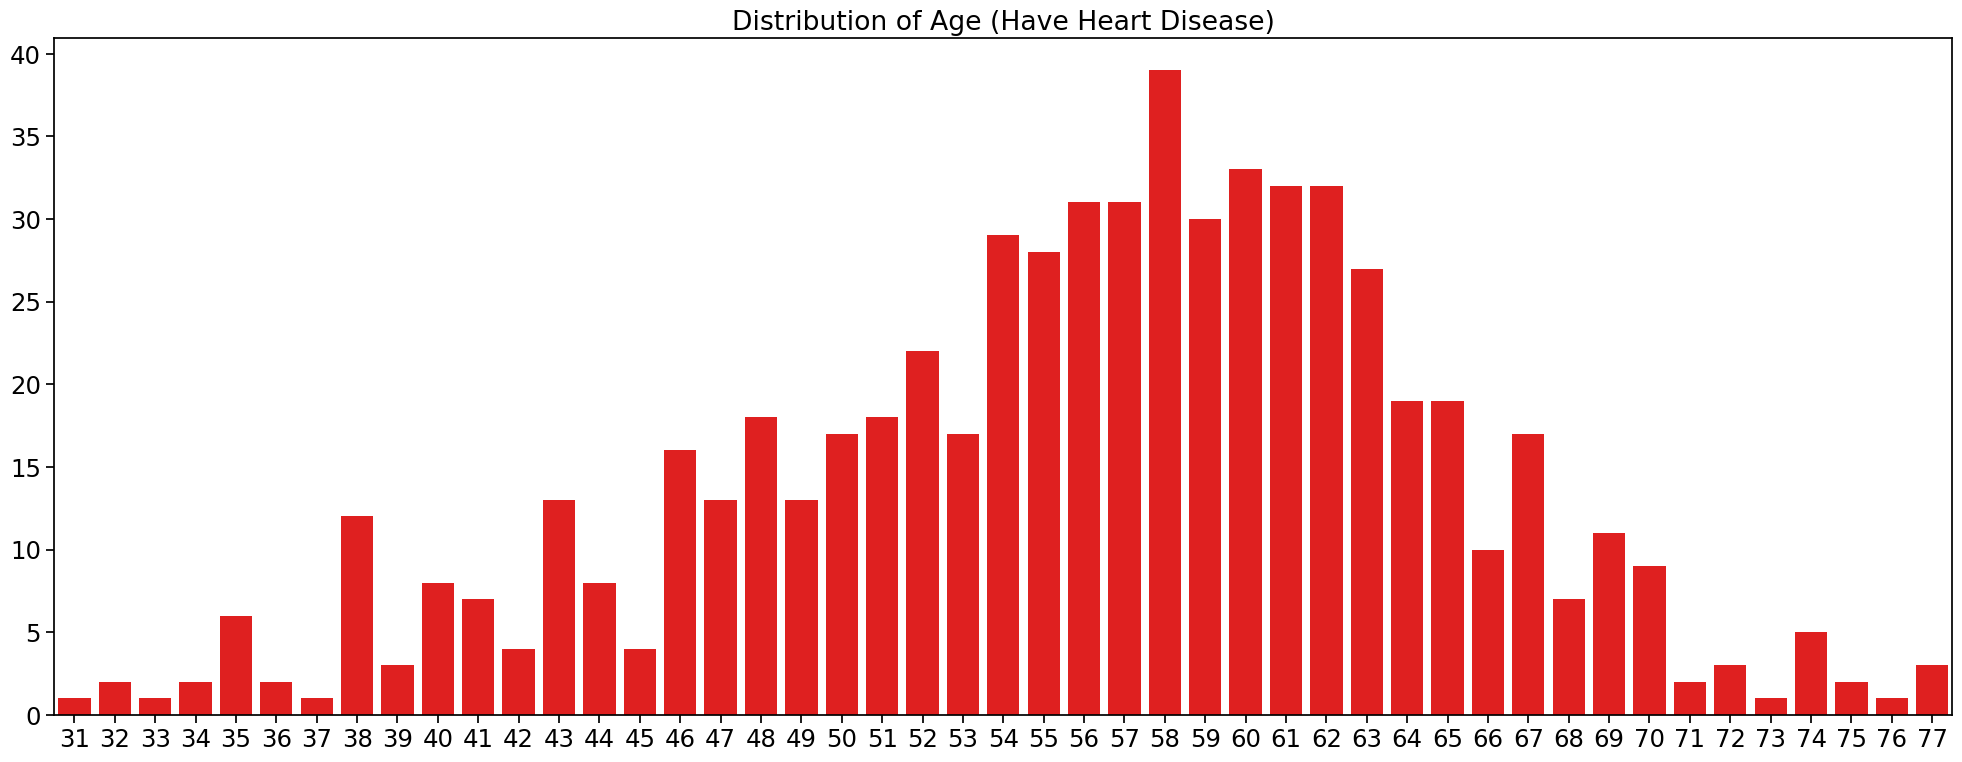

In [10]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.6)
sns.barplot(x=df.age[df.target==1].value_counts().index,y=df.age[df.target==1].value_counts().values, color = 'red')
plt.title("Distribution of Age (Have Heart Disease)")
plt.tight_layout()

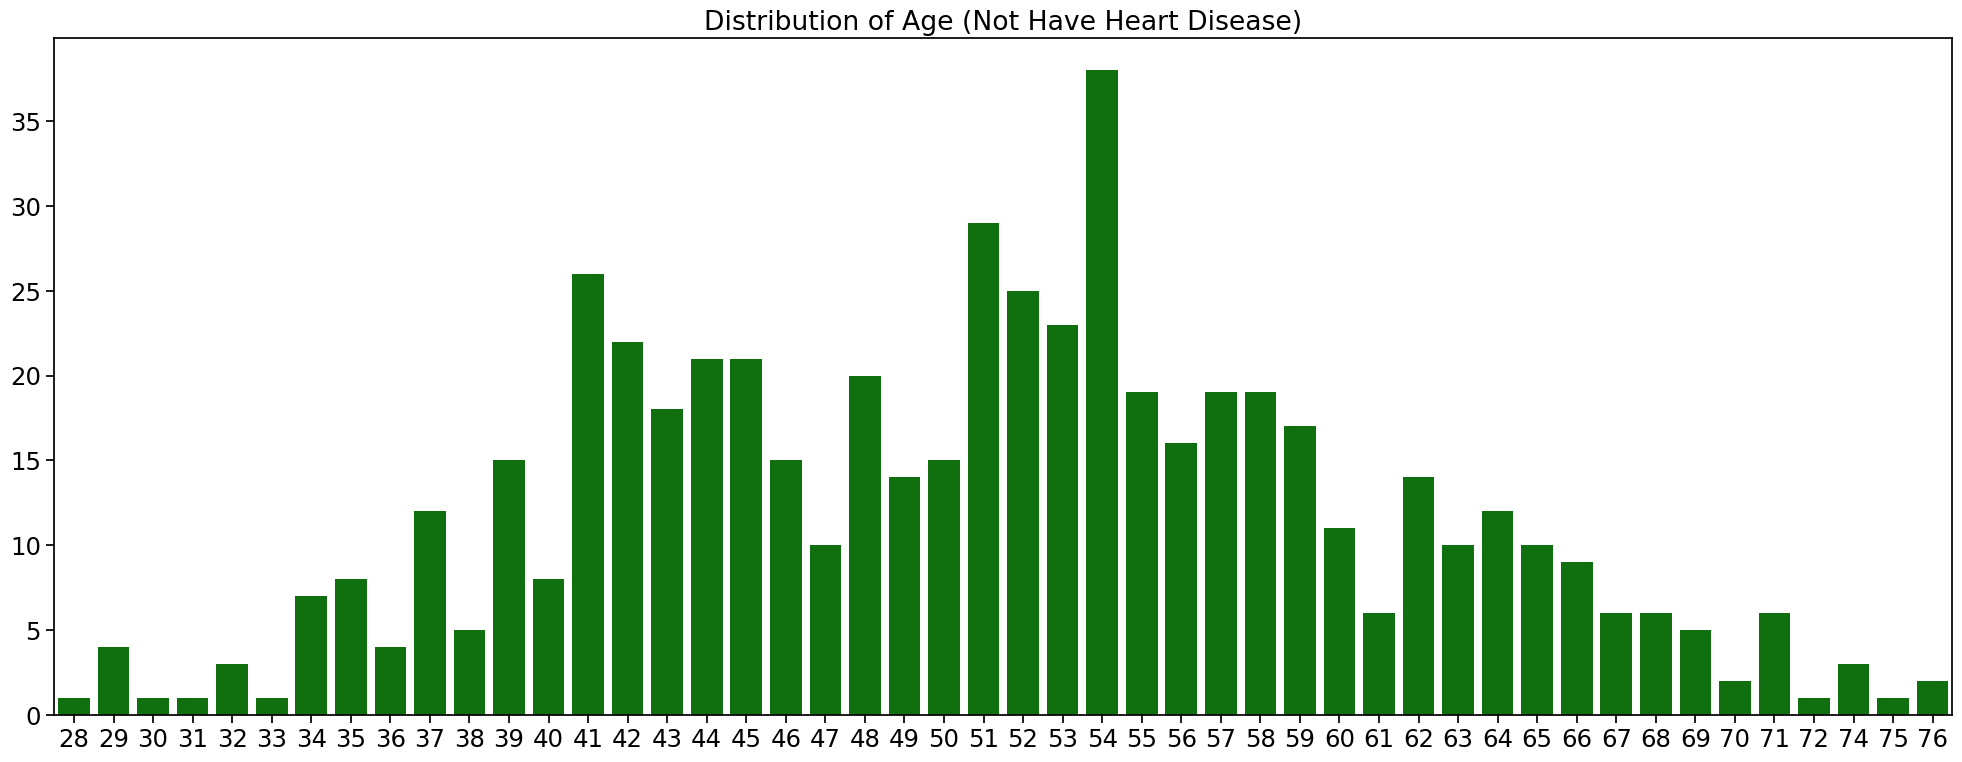

In [11]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.6)
sns.barplot(x=df.age[df.target==0].value_counts().index,y=df.age[df.target==0].value_counts().values, color = 'green')
plt.title("Distribution of Age (Not Have Heart Disease)")
plt.tight_layout()

As can be seen in the graphs above, early middle-aged people have a better rate of being healthy.

### Sex Analysis

In [198]:
cond0=df["sex"]==0
cond1=df["sex"]==1
condhd0=df[df.target==1]["sex"]==0
condhd1=df[df.target==1]["sex"]==1
conddhd0=df[df.target==0]["sex"]==0
conddhd1=df[df.target==0]["sex"]==1
f_count=len(df[cond0])
m_count=len(df[cond1])
hdf_count=len(df[df.target==1][condhd0])
hdm_count=len(df[df.target==1][condhd1])
dhdf_count=len(df[df.target==0][conddhd0])
dhdm_count=len(df[df.target==0][conddhd1])
print('Female Count (All):',f_count)
print('Female Count (Have Disease):',hdf_count)
print('Female Count (Healthy):',dhdf_count)
print('Male Count (All):',m_count)
print('Male Count (Have Disease):',hdm_count)
print('Male Count (Healthy):',dhdm_count)

Female Count (All): 281
Female Count (Have Disease): 70
Female Count (Healthy): 211
Male Count (All): 909
Male Count (Have Disease): 559
Male Count (Healthy): 350


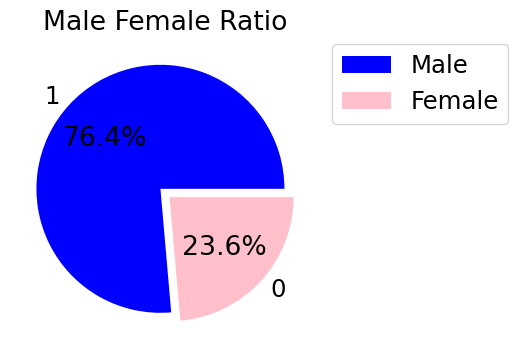

In [13]:
df.sex.value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode=[0.05, 0.05], figsize = (4, 6), colors = ['blue', 'pink'])
plt.title('Male Female Ratio')
plt.legend(['Male', 'Female'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('')
plt.show()

Since most of the datas consist of males, it may be hard to make analysis between sex and having heart disease.

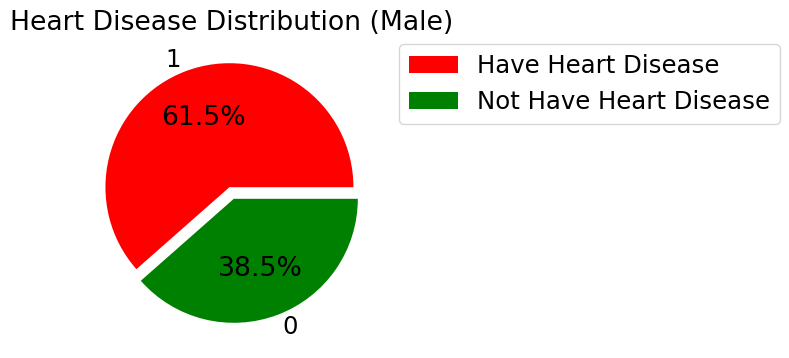

In [14]:
df.target[df.sex==1].value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode=[0.05, 0.05],
                                         figsize = (4, 6),colors = ['red', 'green'])
plt.title('Heart Disease Distribution (Male)')
plt.legend(['Have Heart Disease', 'Not Have Heart Disease'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('')
plt.show()

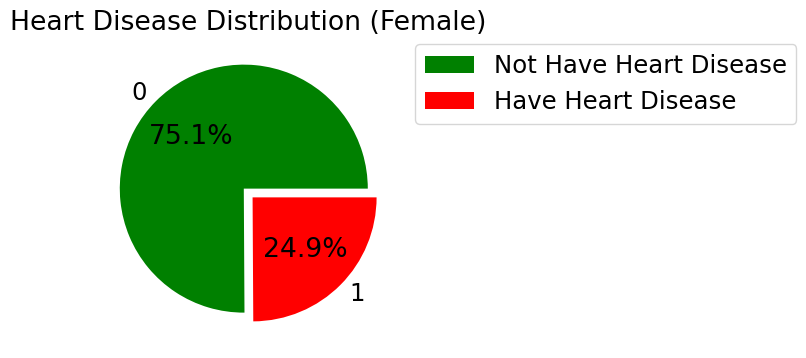

In [15]:
df.target[df.sex==0].value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode=[0.05, 0.05],
                                         figsize = (4, 6), colors = ['green', 'red'])
plt.title('Heart Disease Distribution (Female)')
plt.legend(['Not Have Heart Disease', 'Have Heart Disease'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('')
plt.show()

In the dataset, males have significantly higher rate (61.5%) having a heart disease than females' rate (24.9%).

### Chest Pain Type Analysis

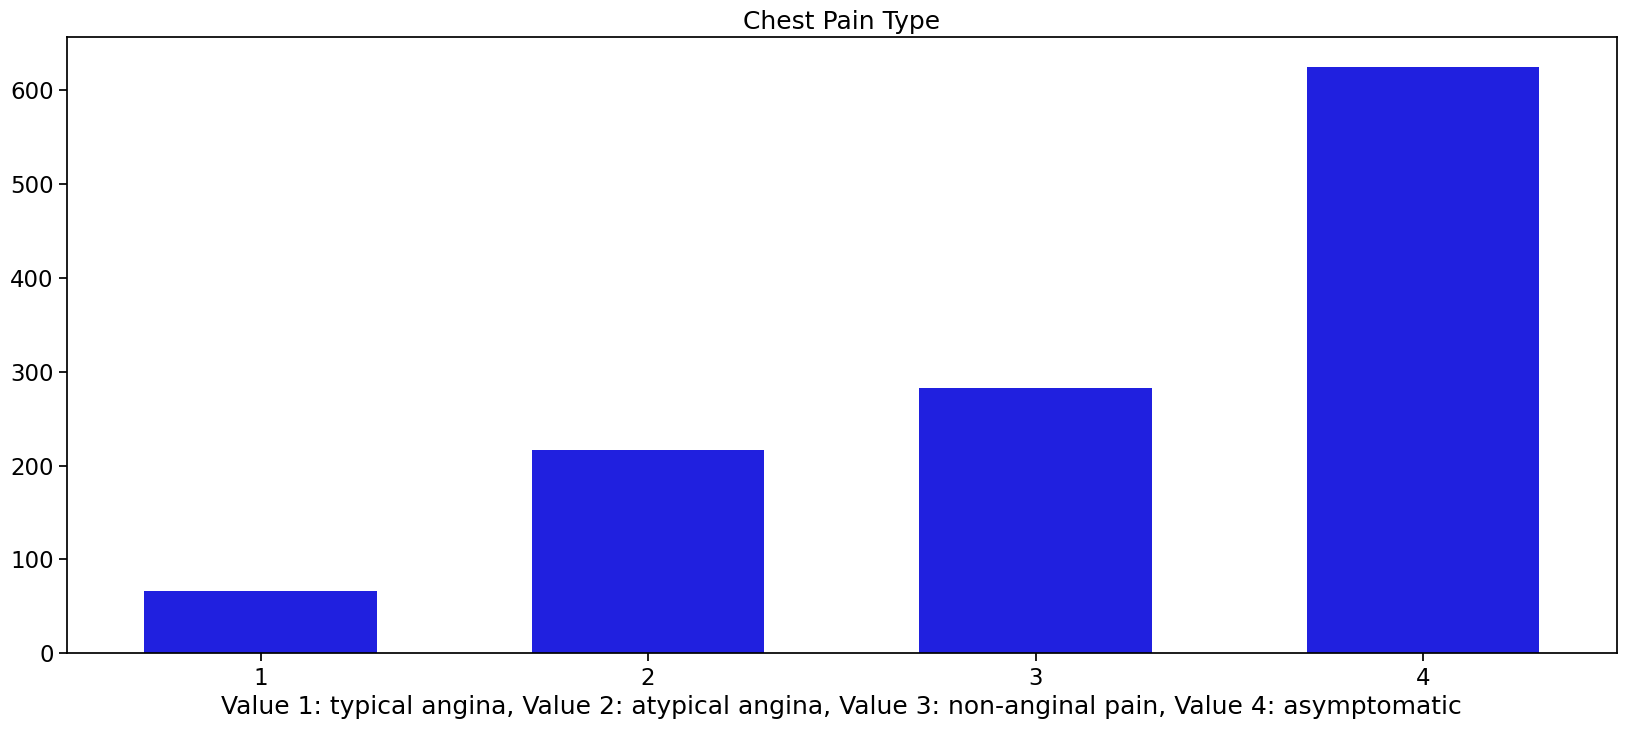

In [16]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df["chest pain type"].value_counts().index,y=df["chest pain type"].value_counts().values,
            color = 'Blue',width=0.6)
plt.title("Chest Pain Type")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")
plt.show()

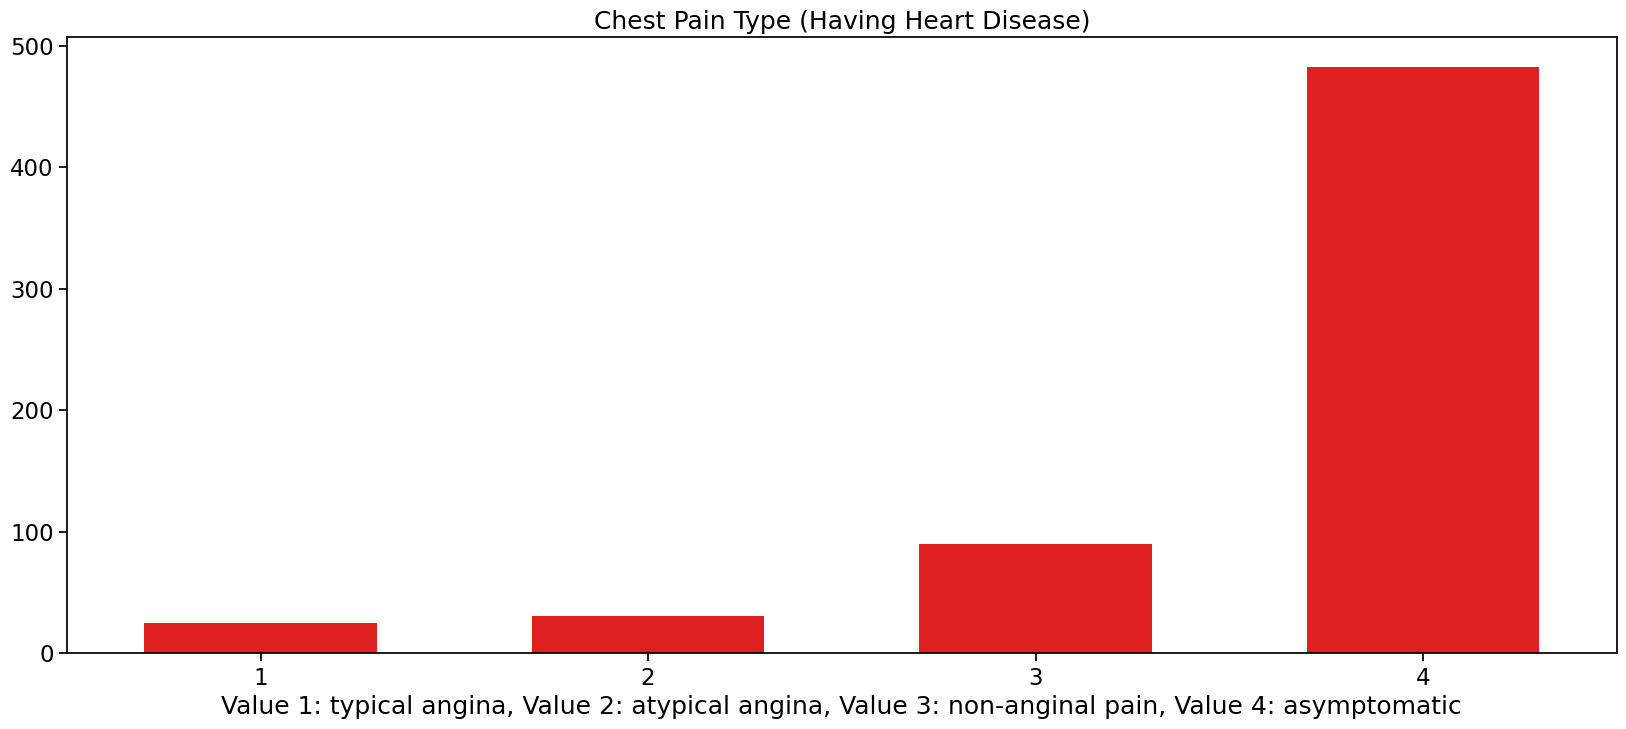

In [17]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df[df.target==1]["chest pain type"].value_counts().index,
            y=df[df.target==1]["chest pain type"].value_counts().values, color = 'red', width=0.6)
plt.title("Chest Pain Type (Having Heart Disease)")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")
plt.show()

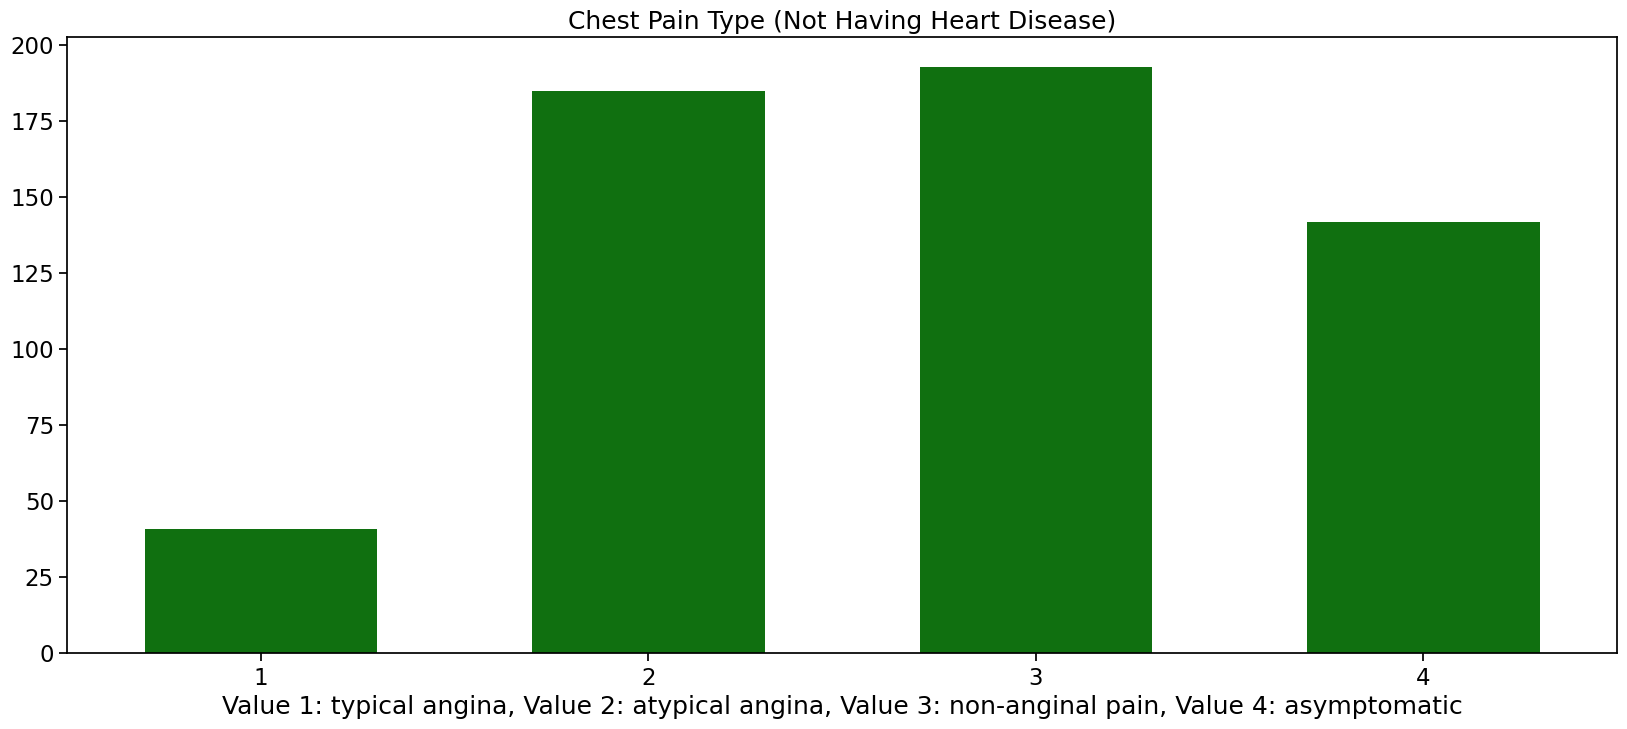

In [18]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df[df.target==0]["chest pain type"].value_counts().index,
            y=df[df.target==0]["chest pain type"].value_counts().values, color = 'green', width=0.6)
plt.title("Chest Pain Type (Not Having Heart Disease)")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")
plt.show()

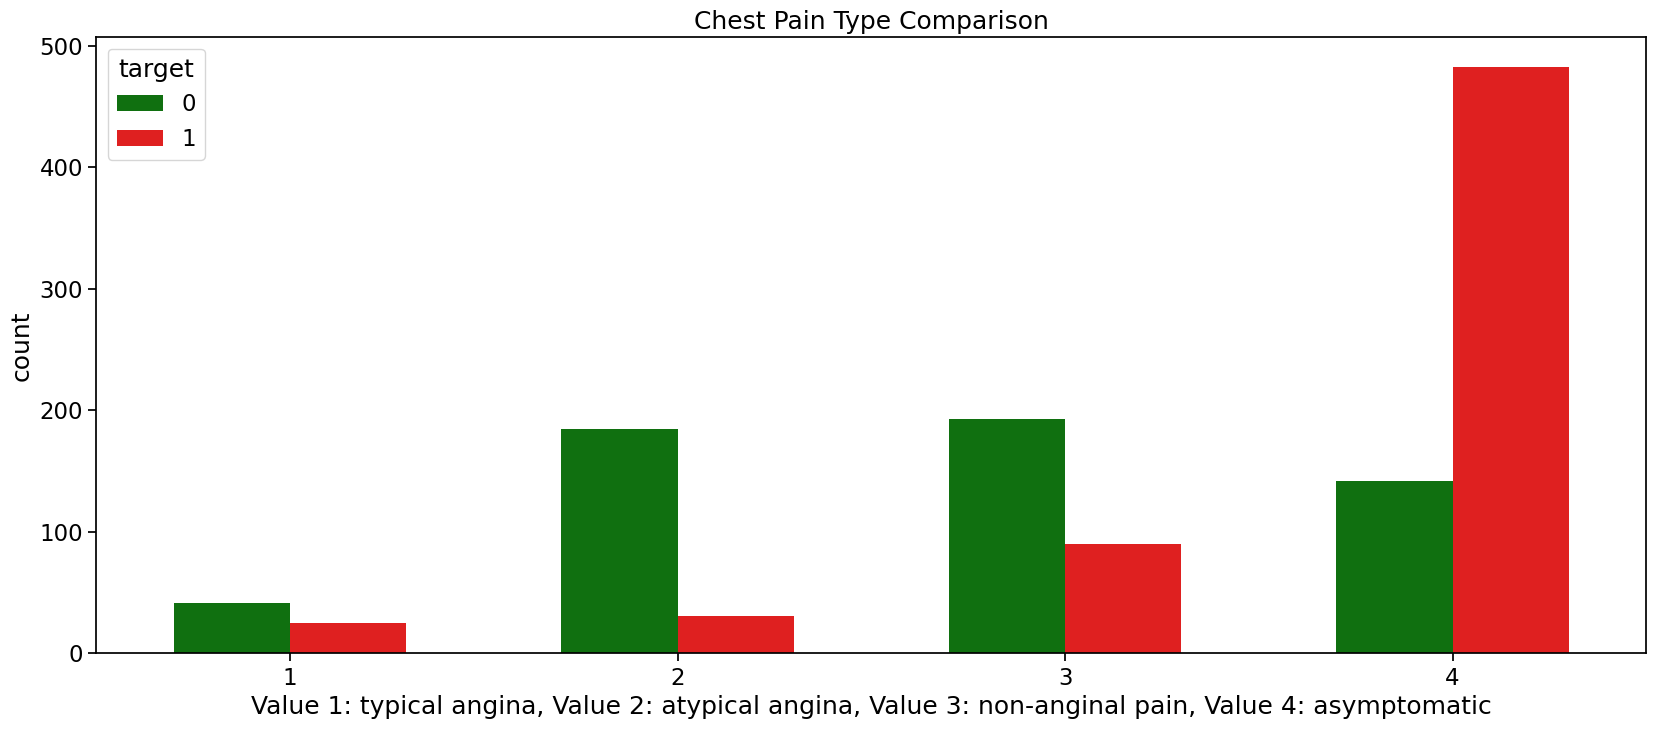

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'chest pain type', data = df, hue = 'target', palette=['green','red'], width=0.6)
plt.title("Chest Pain Type Comparison")
plt.xlabel("Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic")
plt.show()

We can say that from observing graphs above having a asymptomatic chest pain type significantly affects suffering from heart disease.

### Resting Blood Pressure Analysis

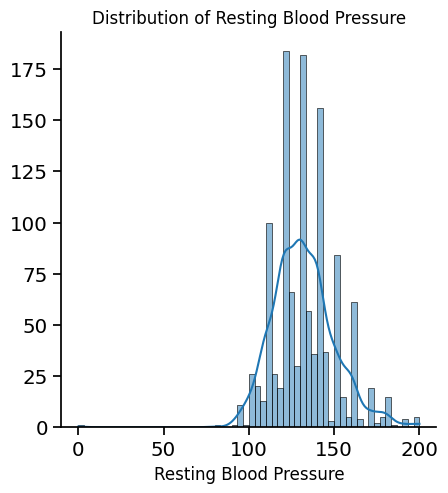

In [199]:
sns.displot( x = 'resting bp s', data = df, bins = 60, kde = True);
plt.title("Distribution of Resting Blood Pressure", fontsize = 12)
plt.xlabel('Resting Blood Pressure', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

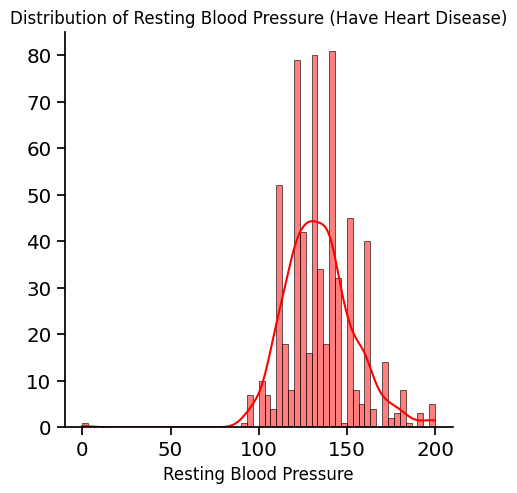

In [200]:
sns.displot( x = 'resting bp s', data = df[df.target==1], bins = 60, kde = True, color = 'red');
plt.title("Distribution of Resting Blood Pressure (Have Heart Disease)", fontsize = 12)
plt.xlabel('Resting Blood Pressure', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

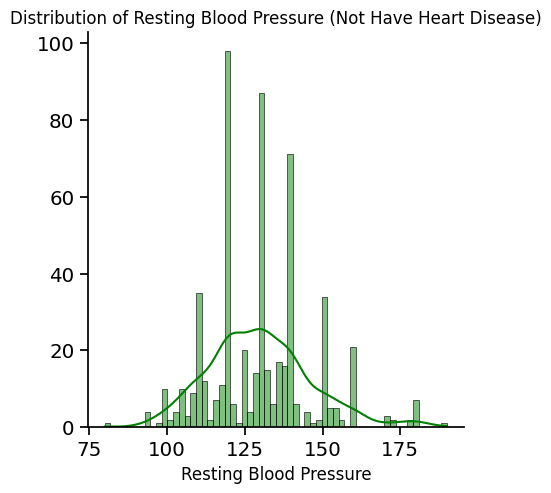

In [201]:
sns.displot( x = 'resting bp s', data = df[df.target==0], bins = 60, kde = True, color = 'green');
plt.title("Distribution of Resting Blood Pressure (Not Have Heart Disease)", fontsize = 12)
plt.xlabel('Resting Blood Pressure', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

According to graphs, resting blood pressure values have similiar shape of distribution whether have heart disease or not.

###  Serum Cholesterol Analysis

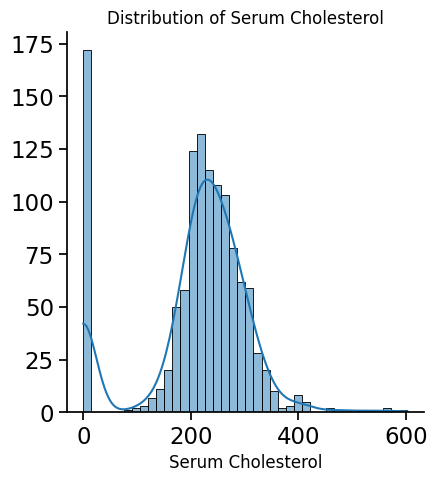

In [27]:
sns.displot( x = 'cholesterol', data = df, bins = 40, kde = True,);
plt.title("Distribution of Serum Cholesterol", fontsize = 12)
plt.xlabel('Serum Cholesterol', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

There are a lot of invalid '0' values which will be handled below before model evaluation.

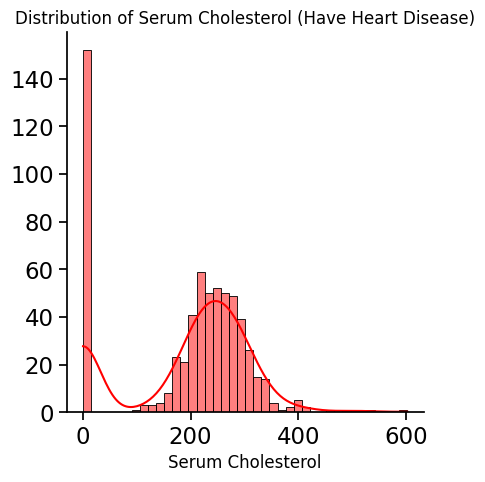

In [28]:
sns.displot( x = 'cholesterol', data = df[df.target==1], bins = 40, kde = True, color = 'red');
plt.title("Distribution of Serum Cholesterol (Have Heart Disease)", fontsize = 12)
plt.xlabel('Serum Cholesterol', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

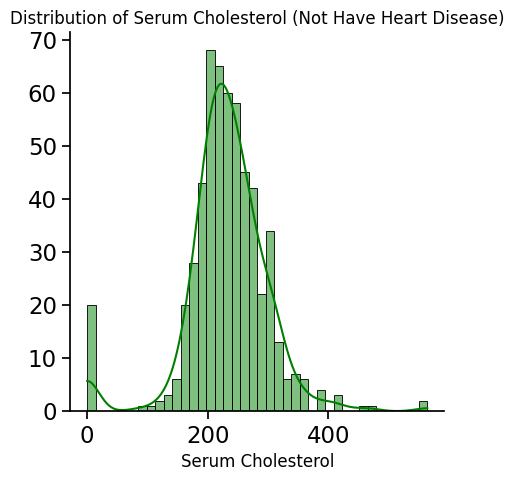

In [29]:
sns.displot( x = 'cholesterol', data = df[df.target==0], bins = 40, kde = True, color = 'green');
plt.title("Distribution of Serum Cholesterol (Not Have Heart Disease)", fontsize = 12)
plt.xlabel('Serum Cholesterol', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

Because of the invalid values ('0'), making an analyisis can be misleading. But, by looking at the rest of the values, we can make similiar comment like we do in analysis of resting blood pressure. So, we can say serum cholesterol has not noticeable effect on whether having a heart disease like resting blood pressure.  

### Fasting Blood Sugar Analysis

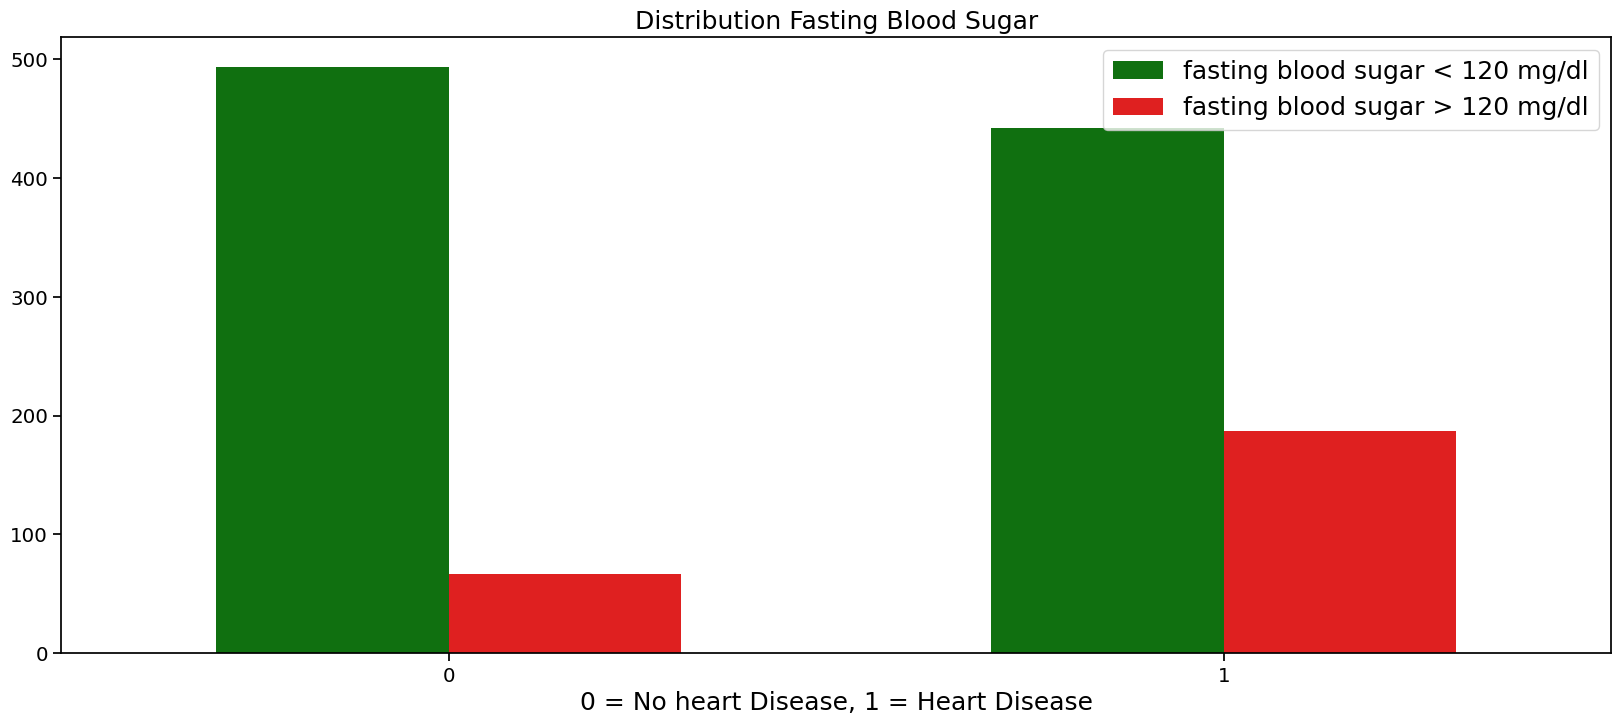

In [202]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'target', data = df, hue = 'fasting blood sugar', palette=['green',"red"], width=0.6)
plt.title("Distribution Fasting Blood Sugar", fontsize = 18)
plt.xlabel("0 = No heart Disease, 1 = Heart Disease", fontsize = 18)
plt.ylabel('', fontsize = 18)
plt.legend(["fasting blood sugar < 120 mg/dl","fasting blood sugar > 120 mg/dl"], fontsize = 18)
plt.show()

In total, people's fasting blood sugar values are generally less than 120 mg/dl. But, we can say that having a heart disease a little bit lowers these rate.

### Analysis of Resting Electrocardiogram Results

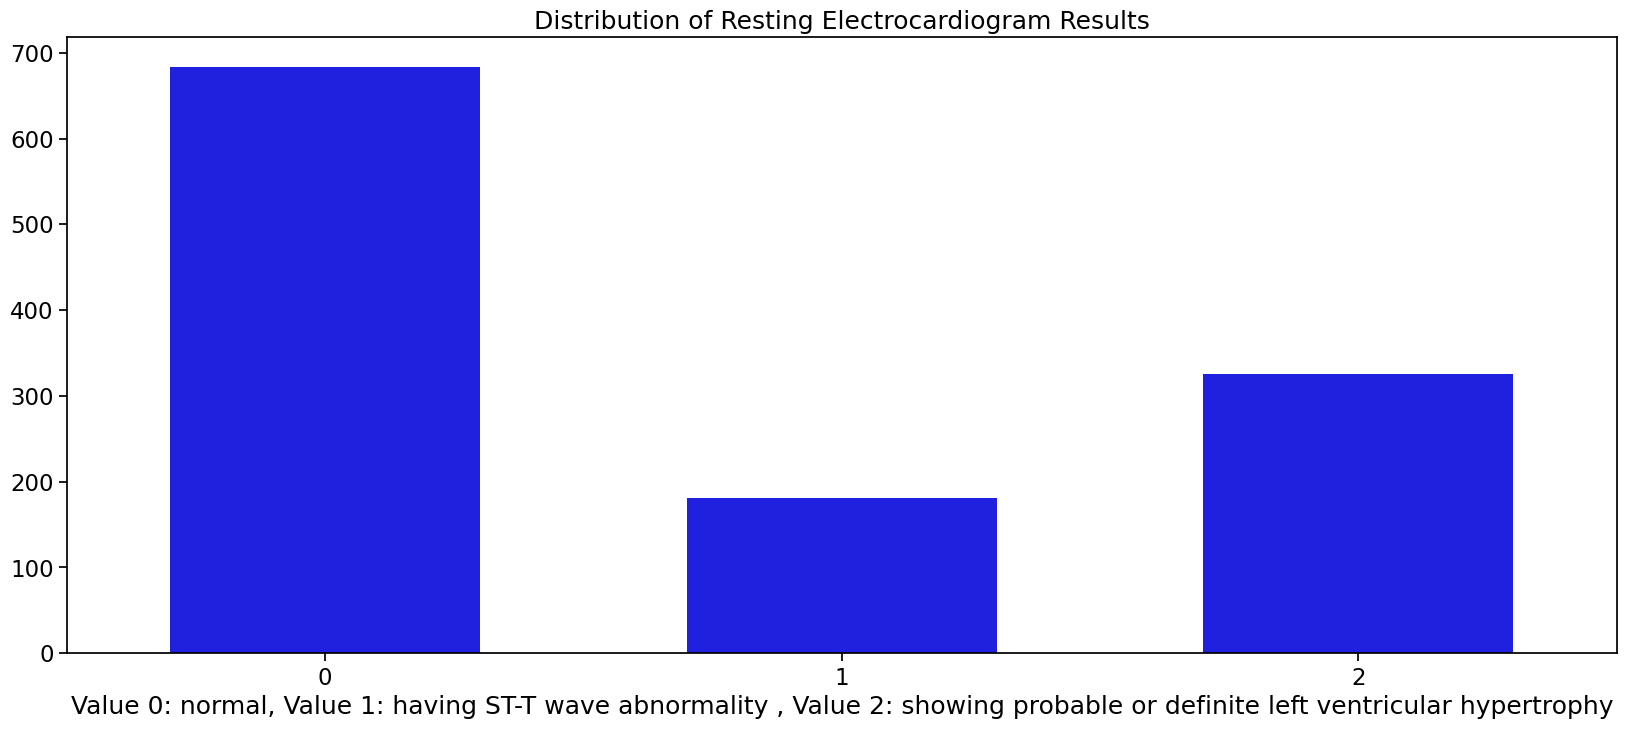

In [31]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df["resting ecg"].value_counts().index,y=df["resting ecg"].value_counts().values,
            color = 'Blue', width=0.6)
plt.title("Distribution of Resting Electrocardiogram Results")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")
plt.show()

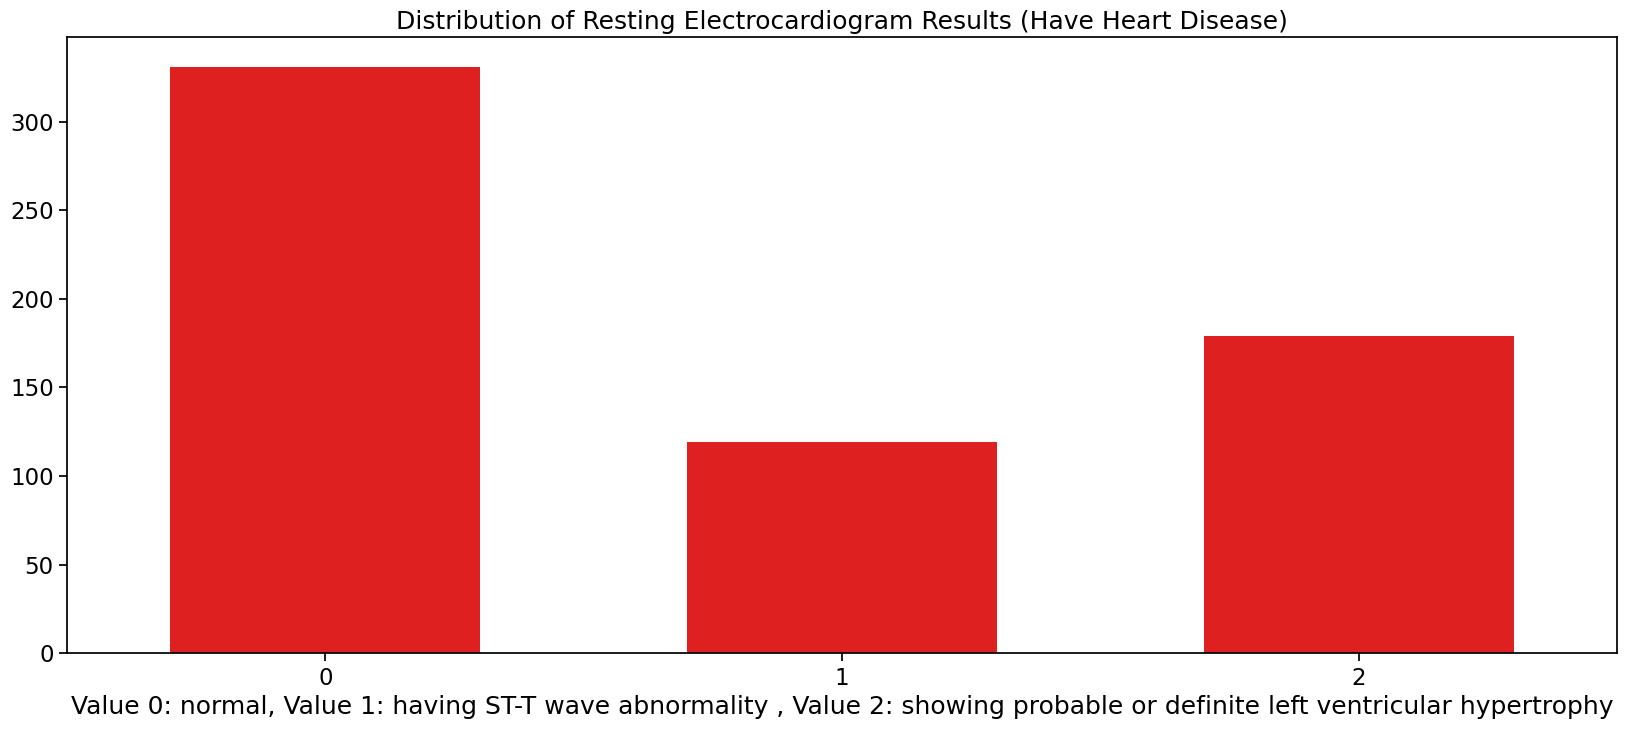

In [32]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df[df.target==1]["resting ecg"].value_counts().index,y=df[df.target==1]["resting ecg"].value_counts().values,
           color = 'Red', width=0.6)
plt.title("Distribution of Resting Electrocardiogram Results (Have Heart Disease)")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")
plt.show()

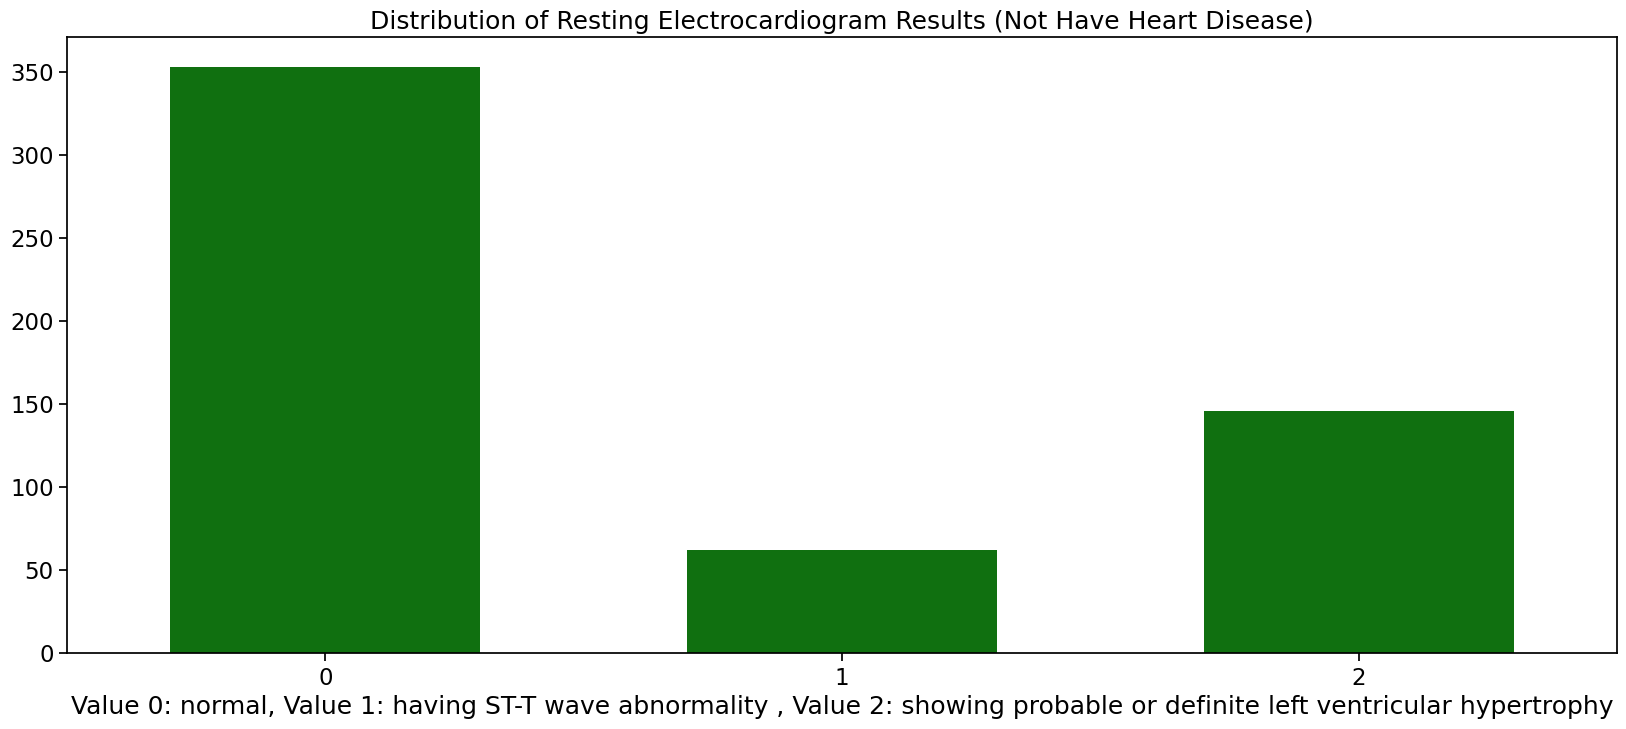

In [33]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df[df.target==0]["resting ecg"].value_counts().index,y=df[df.target==0]["resting ecg"].value_counts().values,
           color = 'Green', width=0.6)
plt.title("Distribution of Resting Electrocardiogram Results (Not Have Heart Disease)")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")
plt.show()

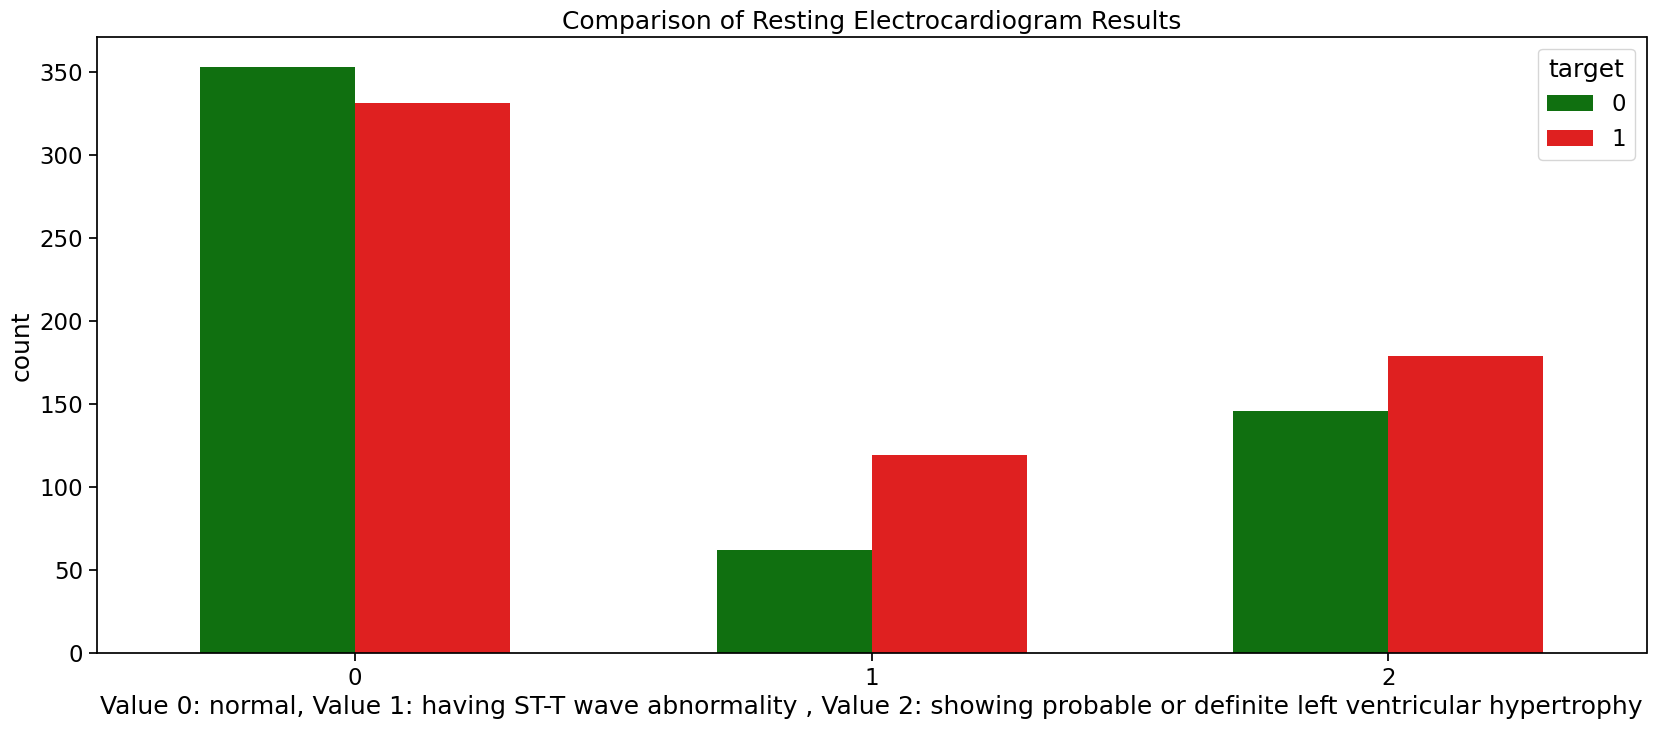

In [34]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x = 'resting ecg', data = df, hue = 'target', palette=['green',"red"], width=0.6)
plt.title("Comparison of Resting Electrocardiogram Results")
plt.xlabel("Value 0: normal, Value 1: having ST-T wave abnormality , Value 2: showing probable or definite left ventricular hypertrophy")
plt.show()

People have generally normal resting electrocardiogram results. According to graph, having ST-T wave abnormality has noticeable impact on having heart disease. But we don't think this feature will have significant effect on models because the number of datas of having  ST-T wave abnormality feature is really low when we consider the whole dataset.

### Analysis of Maximum Heart Rate Achieved

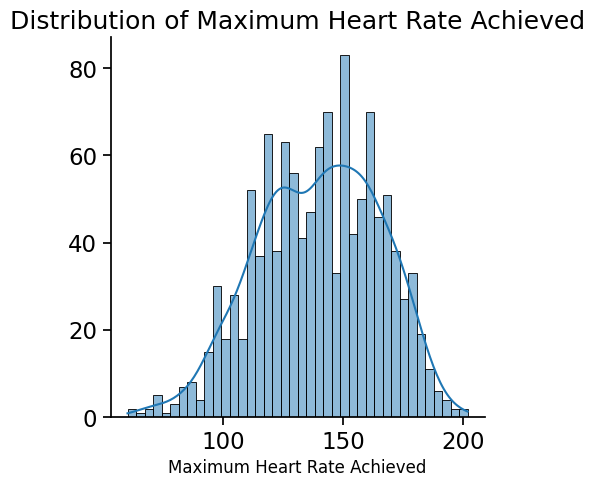

In [35]:
sns.displot( x = 'max heart rate', data = df, bins = 40, kde = True);
plt.title("Distribution of Maximum Heart Rate Achieved")
plt.xlabel('Maximum Heart Rate Achieved', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

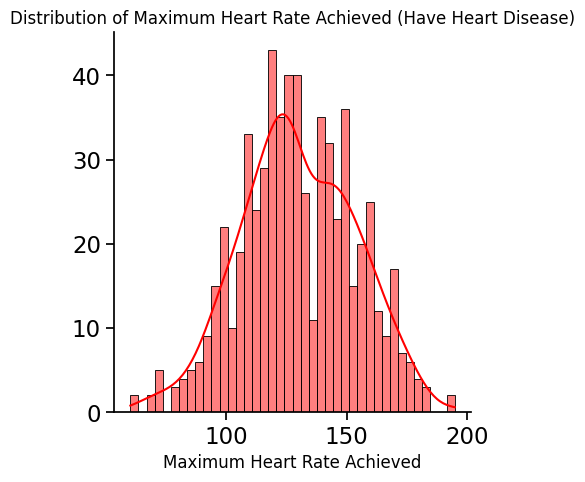

In [205]:
sns.displot( x = 'max heart rate', data = df[df.target==1], bins = 40, kde = True, color = 'red');
plt.title("Distribution of Maximum Heart Rate Achieved (Have Heart Disease)", fontsize = 12)
plt.xlabel('Maximum Heart Rate Achieved', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

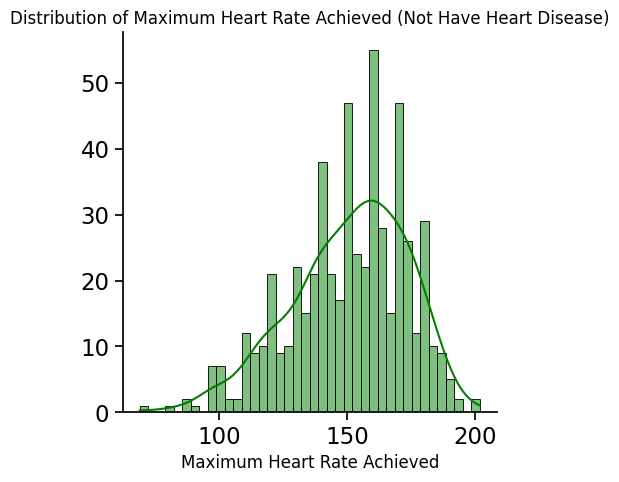

In [204]:
sns.displot( x = 'max heart rate', data = df[df.target==0], bins = 40, kde = True, color = 'green');
plt.title("Distribution of Maximum Heart Rate Achieved (Not Have Heart Disease)", fontsize = 12)
plt.xlabel('Maximum Heart Rate Achieved', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

Healthy people generally have higher maximum heart rate than people that having a heart disease. So, this feature may be important on model.

 ### Analysis of Exercise Induced Angina

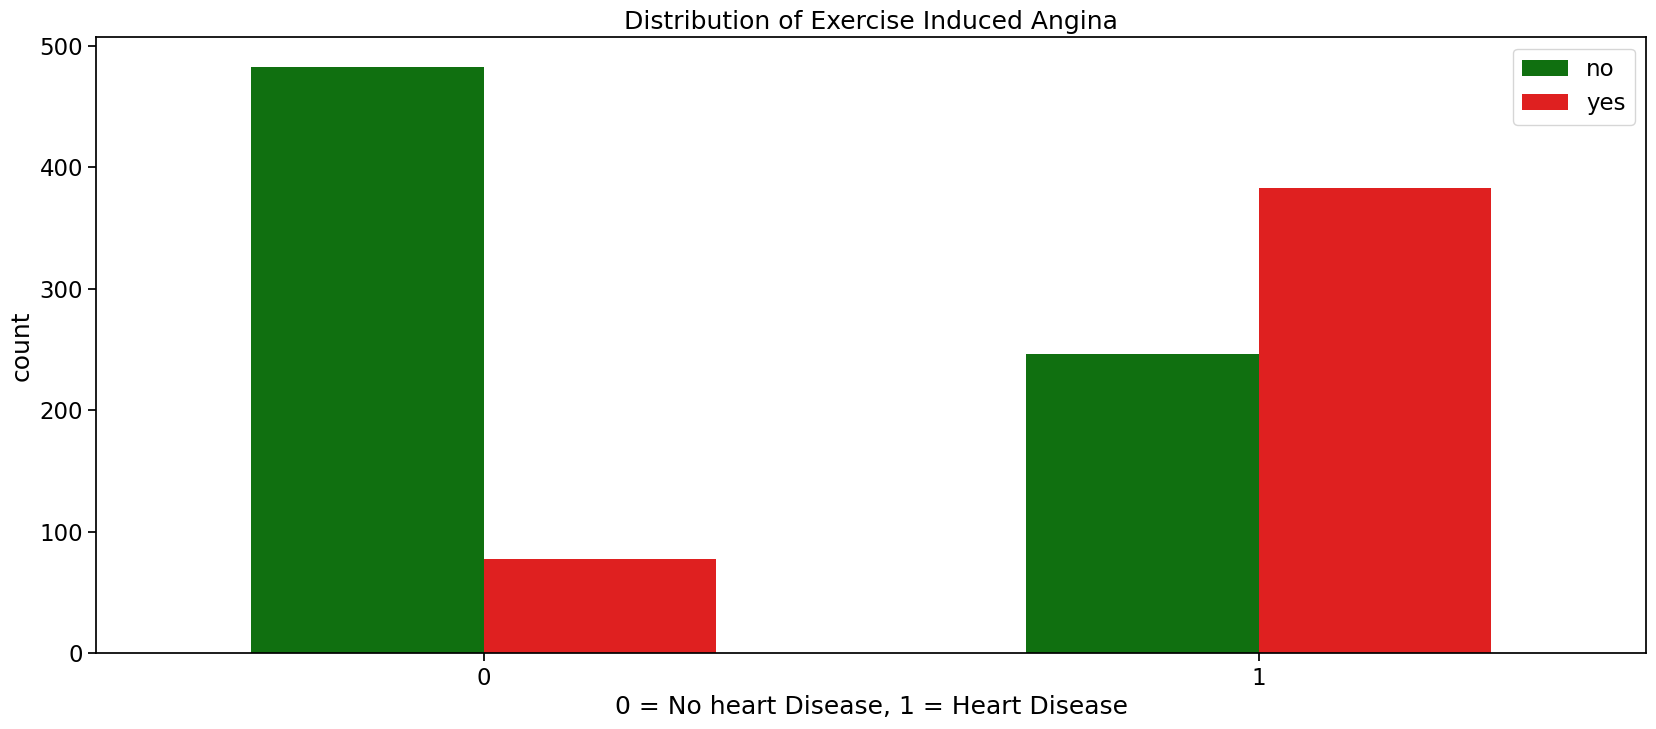

In [203]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x = 'target', data = df, hue = 'exercise angina', palette=['green',"red"], width = 0.6)
plt.title("Distribution of Exercise Induced Angina")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease")
plt.legend(["no","yes"])
plt.show()

Most of the healty people don't suffer from exercise induced angina, while others do. So, also this feature can be important on model. 

### Distribution of Oldpeak 

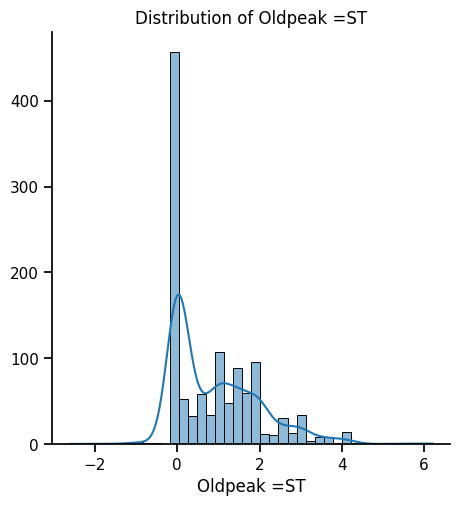

In [227]:
sns.displot( x = 'oldpeak', data = df, bins = 40, kde = True)
plt.xlabel('Oldpeak =ST', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.title("Distribution of Oldpeak =ST", fontsize = 12)
plt.show()

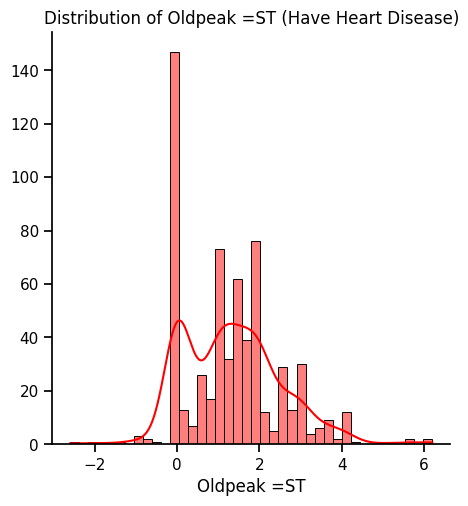

In [228]:
sns.displot( x = 'oldpeak', data = df[df.target==1], bins = 40, kde = True, color = 'red');
plt.xlabel('Oldpeak =ST', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.title("Distribution of Oldpeak =ST (Have Heart Disease)", fontsize = 12)
plt.show()

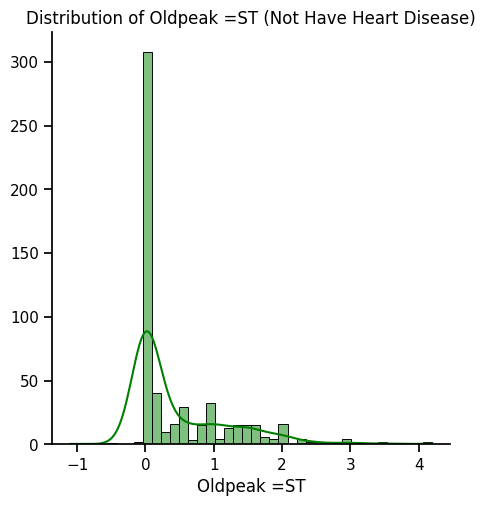

In [229]:
sns.displot( x = 'oldpeak', data = df[df.target==0], bins = 40, kde = True, color = 'green');
plt.xlabel('Oldpeak =ST', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.title("Distribution of Oldpeak =ST (Not Have Heart Disease)", fontsize = 12)
plt.show()

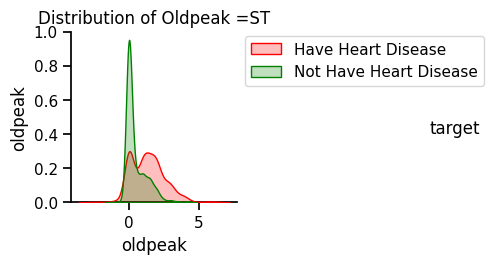

In [224]:
sns.set_context('notebook',font_scale = 1)
sns.pairplot(df, hue = 'target', vars = ['oldpeak'], palette = ["green","red"])
plt.title("Distribution of Oldpeak =ST")
plt.legend(["Have Heart Disease","Not Have Heart Disease"],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

According to graph above, people that have heart disease have higher values of oldpeak =ST.

### Analysis of the slope of the peak exercise ST segment

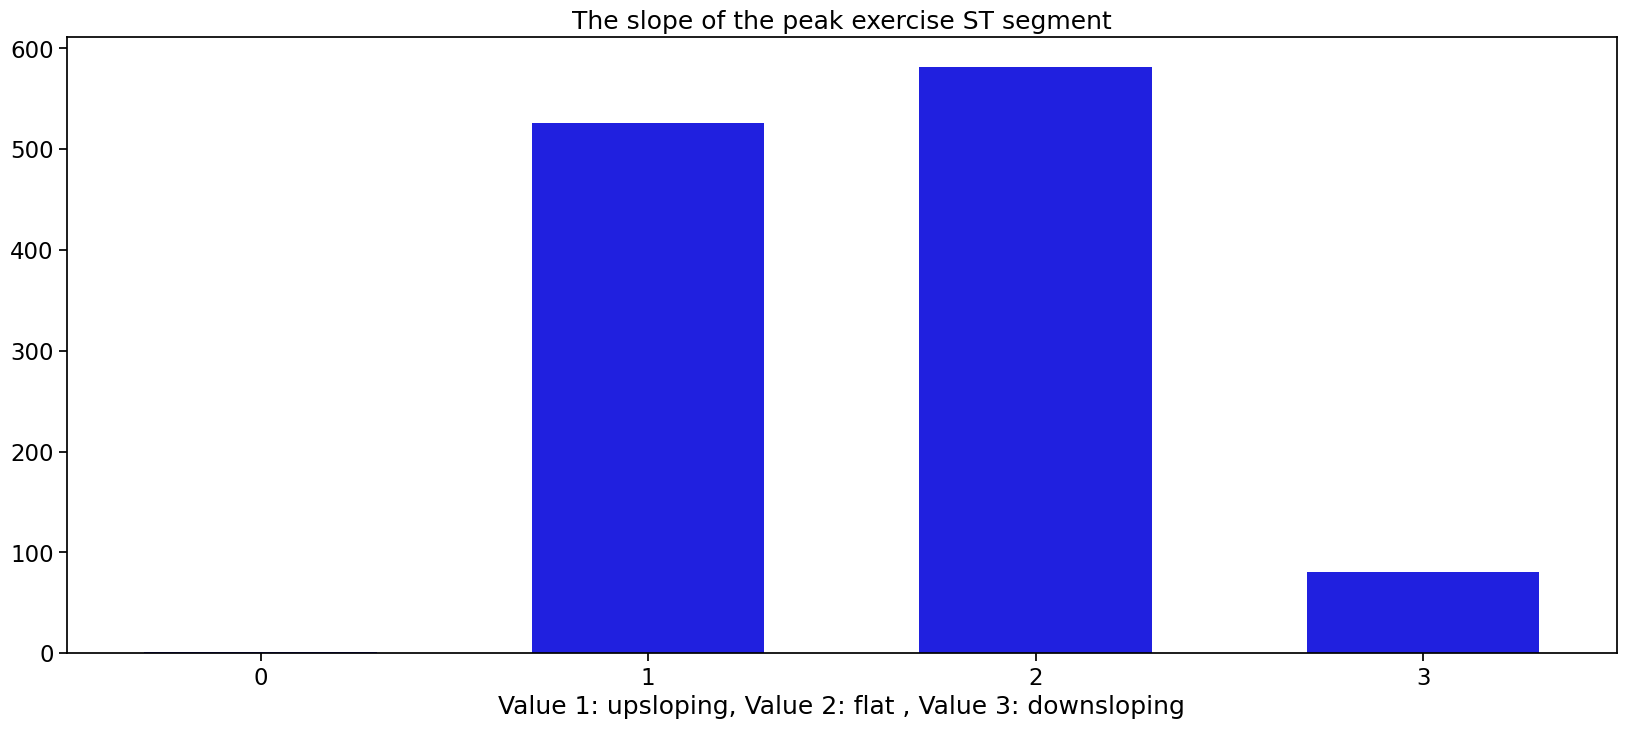

In [42]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df["ST slope"].value_counts().index,y=df["ST slope"].value_counts().values,
           color = 'Blue', width=0.6)
plt.title("The slope of the peak exercise ST segment")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")
plt.show()

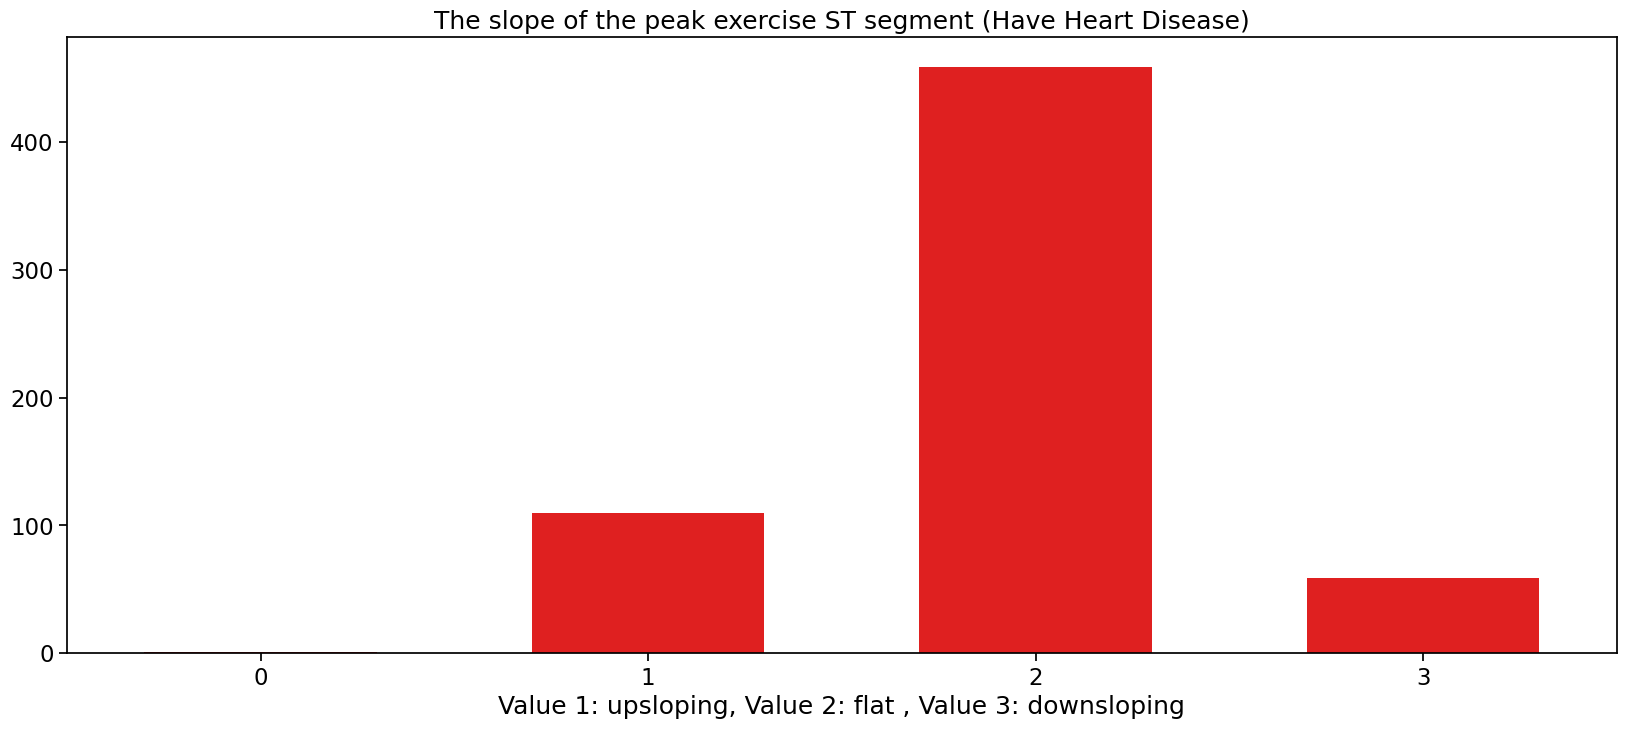

In [43]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df[df.target==1]["ST slope"].value_counts().index,y=df[df.target==1]["ST slope"].value_counts().values,
           color = 'Red', width=0.6)
plt.title("The slope of the peak exercise ST segment (Have Heart Disease)")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")
plt.show()

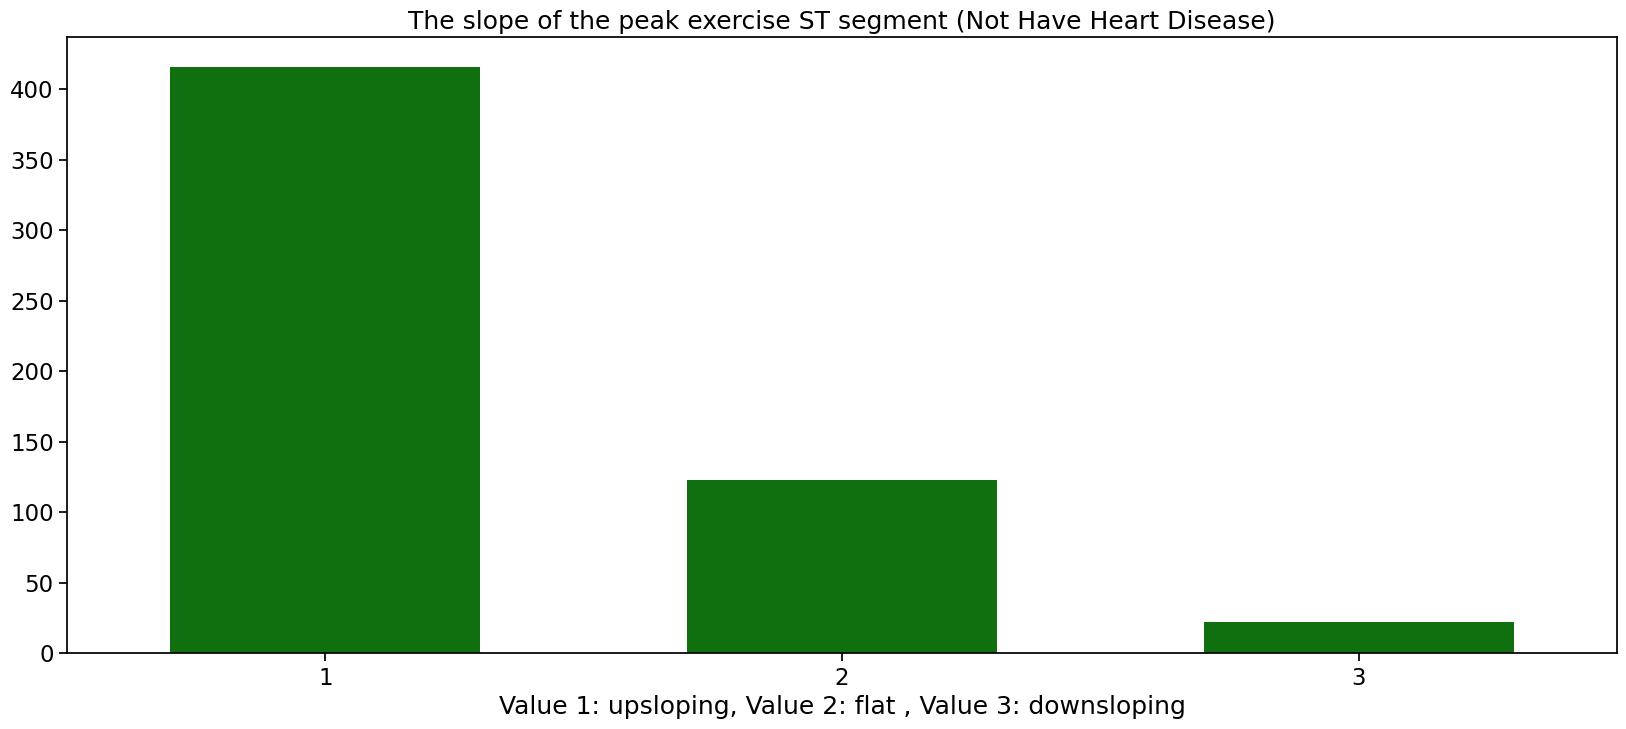

In [44]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df[df.target==0]["ST slope"].value_counts().index,y=df[df.target==0]["ST slope"].value_counts().values,
           color = 'green', width=0.6)
plt.title("The slope of the peak exercise ST segment (Not Have Heart Disease)")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")
plt.show()

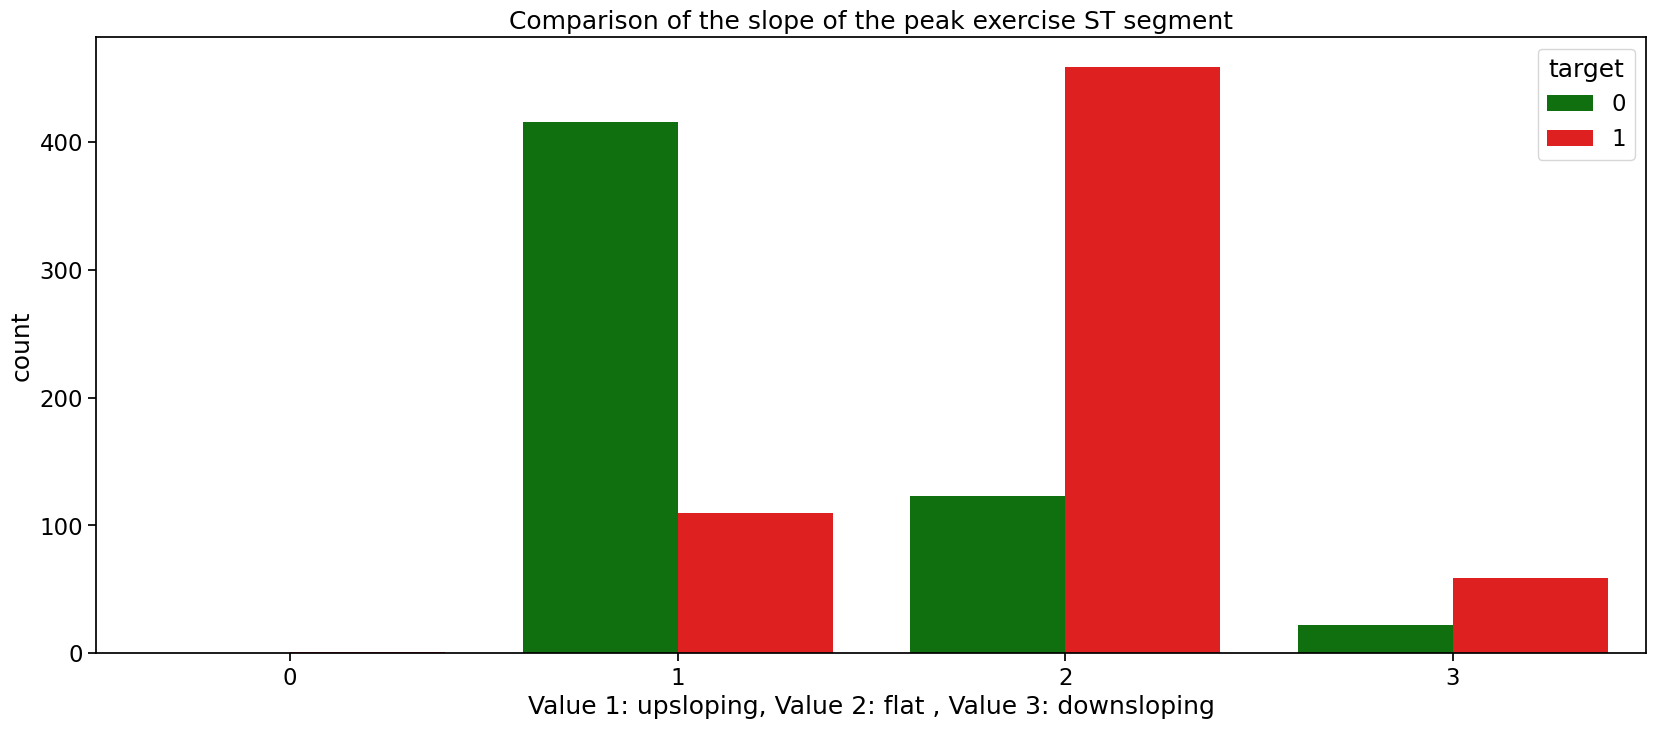

In [45]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x = 'ST slope', data = df, hue = 'target', palette=['green','red'])
plt.title("Comparison of the slope of the peak exercise ST segment")
plt.xlabel("Value 1: upsloping, Value 2: flat , Value 3: downsloping")
plt.show()                                                                  

We can say having flat and downsloping slope of the peak exercise ST segment significantly impacts having heart disease. But flat slope have higher number of datas. So, this can be effective on model.

'ST slope' have a value that is 0, but in our dataset 0 has no meaning. 'Cholesterol' also has invalid values. To fix it we will try 2 methods;<br> 1) Dropping values that are invalid.<br> 2) Interpolation.

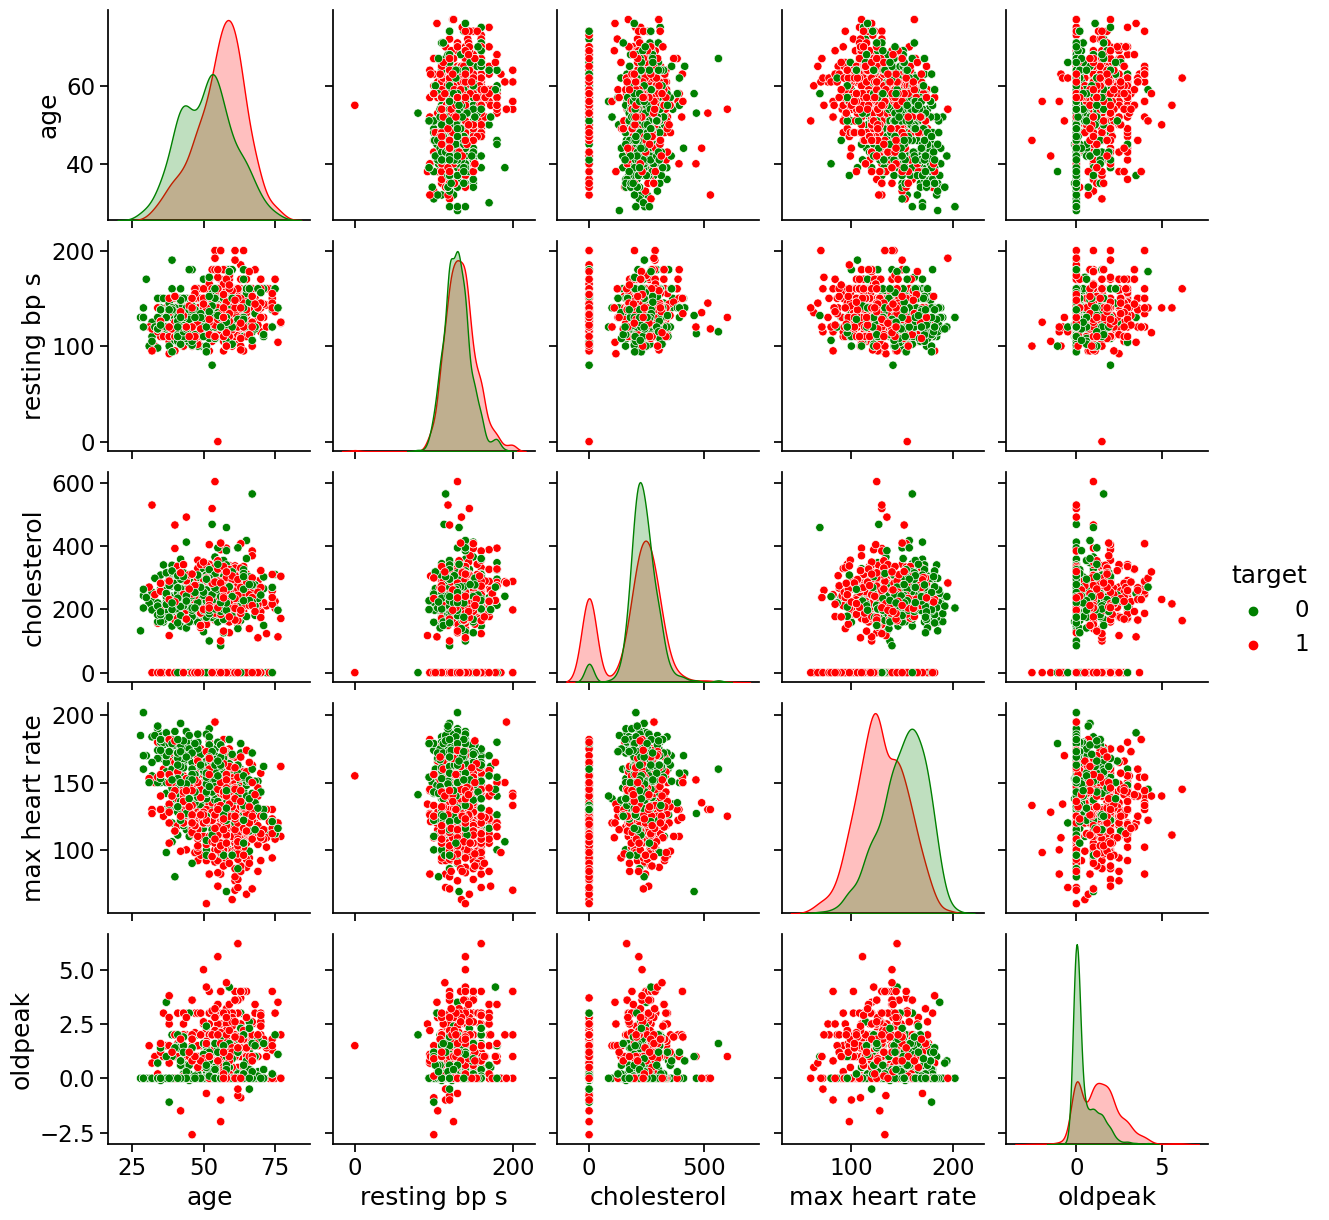

In [46]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak'],
             palette = ["green","red"])
plt.show()

In [47]:
len(df[df["ST slope"]==0])

1

In [48]:
len(df[df["cholesterol"]==0])

172

In the first method, we will drop these invalid values. Then we will detect outliers. After dropping outliers, we can finally construct and evaluate models. In the second method, we will do interpolation instead of dropping invalid values.

## 3. Model Constructing

### 3.1 Preapering data to model with dropping invalid values and outliers

In [49]:
df_dropped = df.copy()

In [50]:
df_dropped.drop(df_dropped[df_dropped["cholesterol"] == 0].index, inplace=True)
df_dropped.drop(df_dropped[df_dropped["ST slope"] == 0].index, inplace=True)
df_dropped.shape # dropped invalid values

(1017, 12)

In [51]:
df_dropped.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1017.000000  1017.000000      1017.000000   1017.000000  1017.000000   
mean     53.280236     0.734513         3.165192    132.554572   245.956735   
std       9.408759     0.441809         0.953778     17.451147    57.250469   
min      28.000000     0.000000         1.000000     92.000000    85.000000   
25%      46.000000     0.000000         2.000000    120.000000   209.000000   
50%      54.000000     1.000000         3.000000    130.000000   240.000000   
75%      60.000000     1.000000         4.000000    140.000000   276.000000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1017.000000  1017.000000     1017.000000      1017.000000   
mean              0.161259     0.741396      142.741396         0.370698   
std               0.367950     0.898921       24.521584         0.483229   
min               0.000000     0.000000       69.000000         0.000000   
25%               0.000000     0.000000      125.000000         0.000000   
50%               0.000000     0.000000      144.000000         0.000000   
75%               0.000000     2.000000      161.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1017.000000  1017.000000  1017.000000  
mean      0.940118     1.588004     0.468043  
std       1.093810     0.602140     0.499223  
min      -0.100000     1.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     0.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

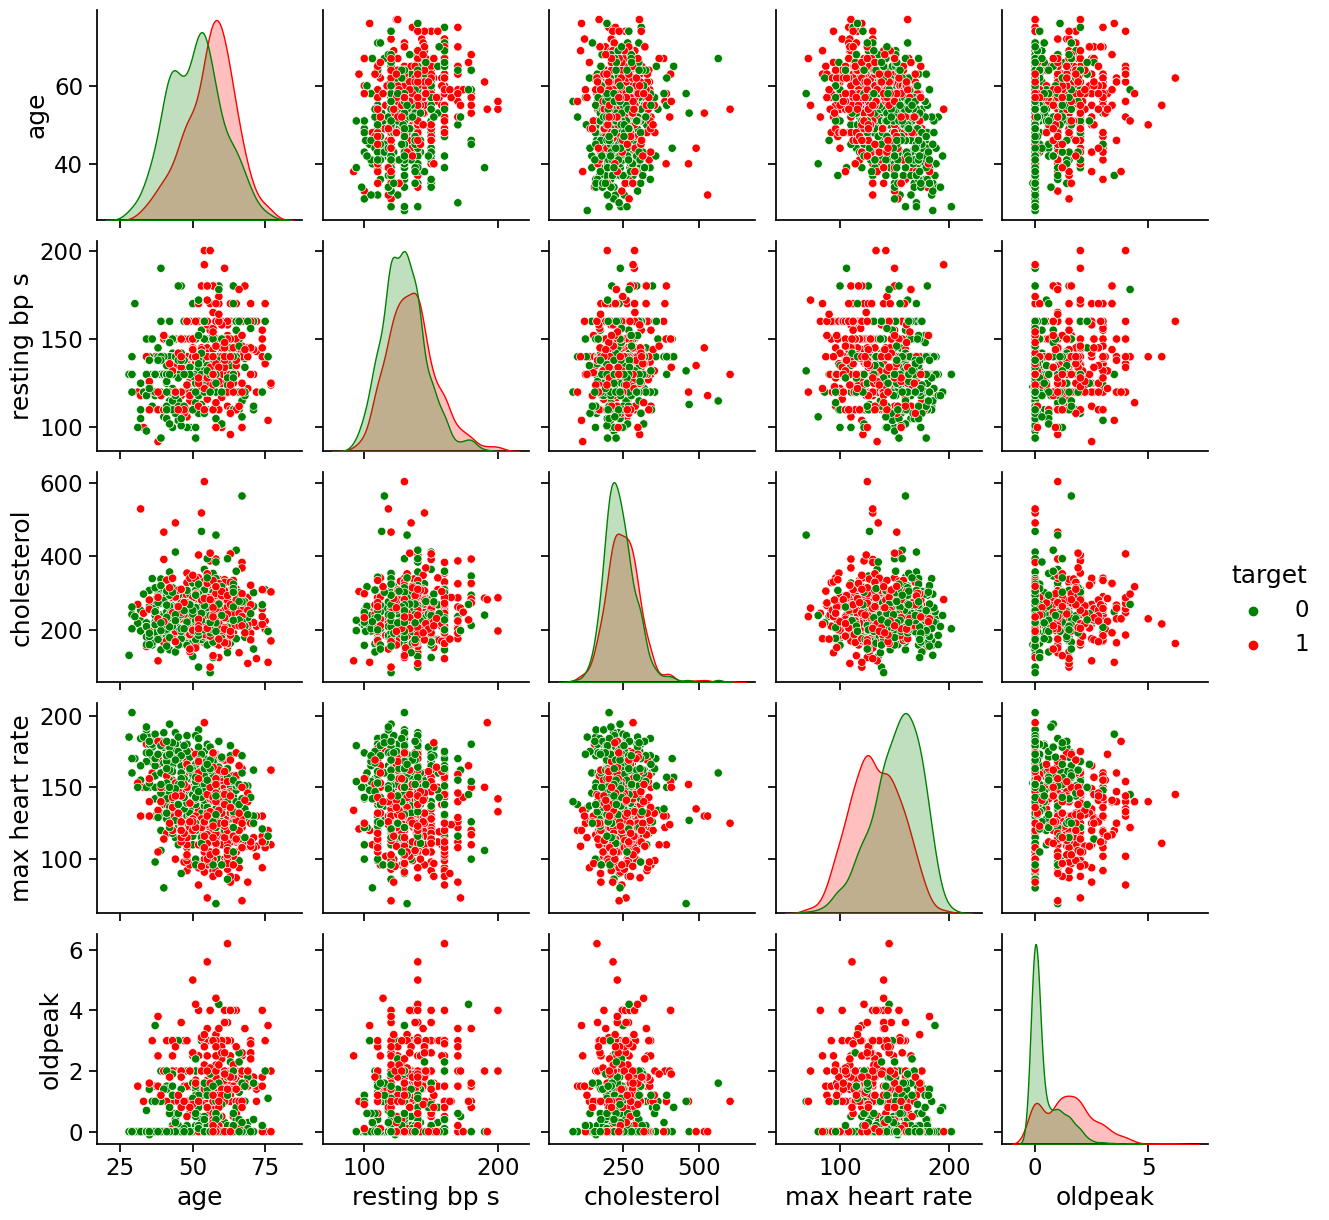

In [52]:
sns.pairplot(df_dropped, hue = 'target', vars = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak'],
             palette = ["green","red"])
plt.show()

We can see outliers to drop from pairplot.

In [53]:
def outlierDetection(df, col): # we will use this function to detect outliers during the project
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
    indices = df[((df[col] > upper)|(df[col] < lower))].index.to_list()
    return  indices # outliers' indices

In [54]:
indices = (outlierDetection(df_dropped, 'cholesterol') 
+ outlierDetection(df_dropped, 'age') 
+outlierDetection(df_dropped, 'resting bp s')
+outlierDetection(df_dropped, 'max heart rate')
+outlierDetection(df_dropped, 'oldpeak'))
indices = list(np.unique(indices))# there can be two of the same,
#we use unique because different columns have outlier in same row 
len(indices) #number of outliers to drop

22

There are 22 outliers to be dropped in our new dataframe.

In [55]:
df_dropped.drop(index=indices, inplace = True)
df_dropped.shape #final shape

(995, 12)

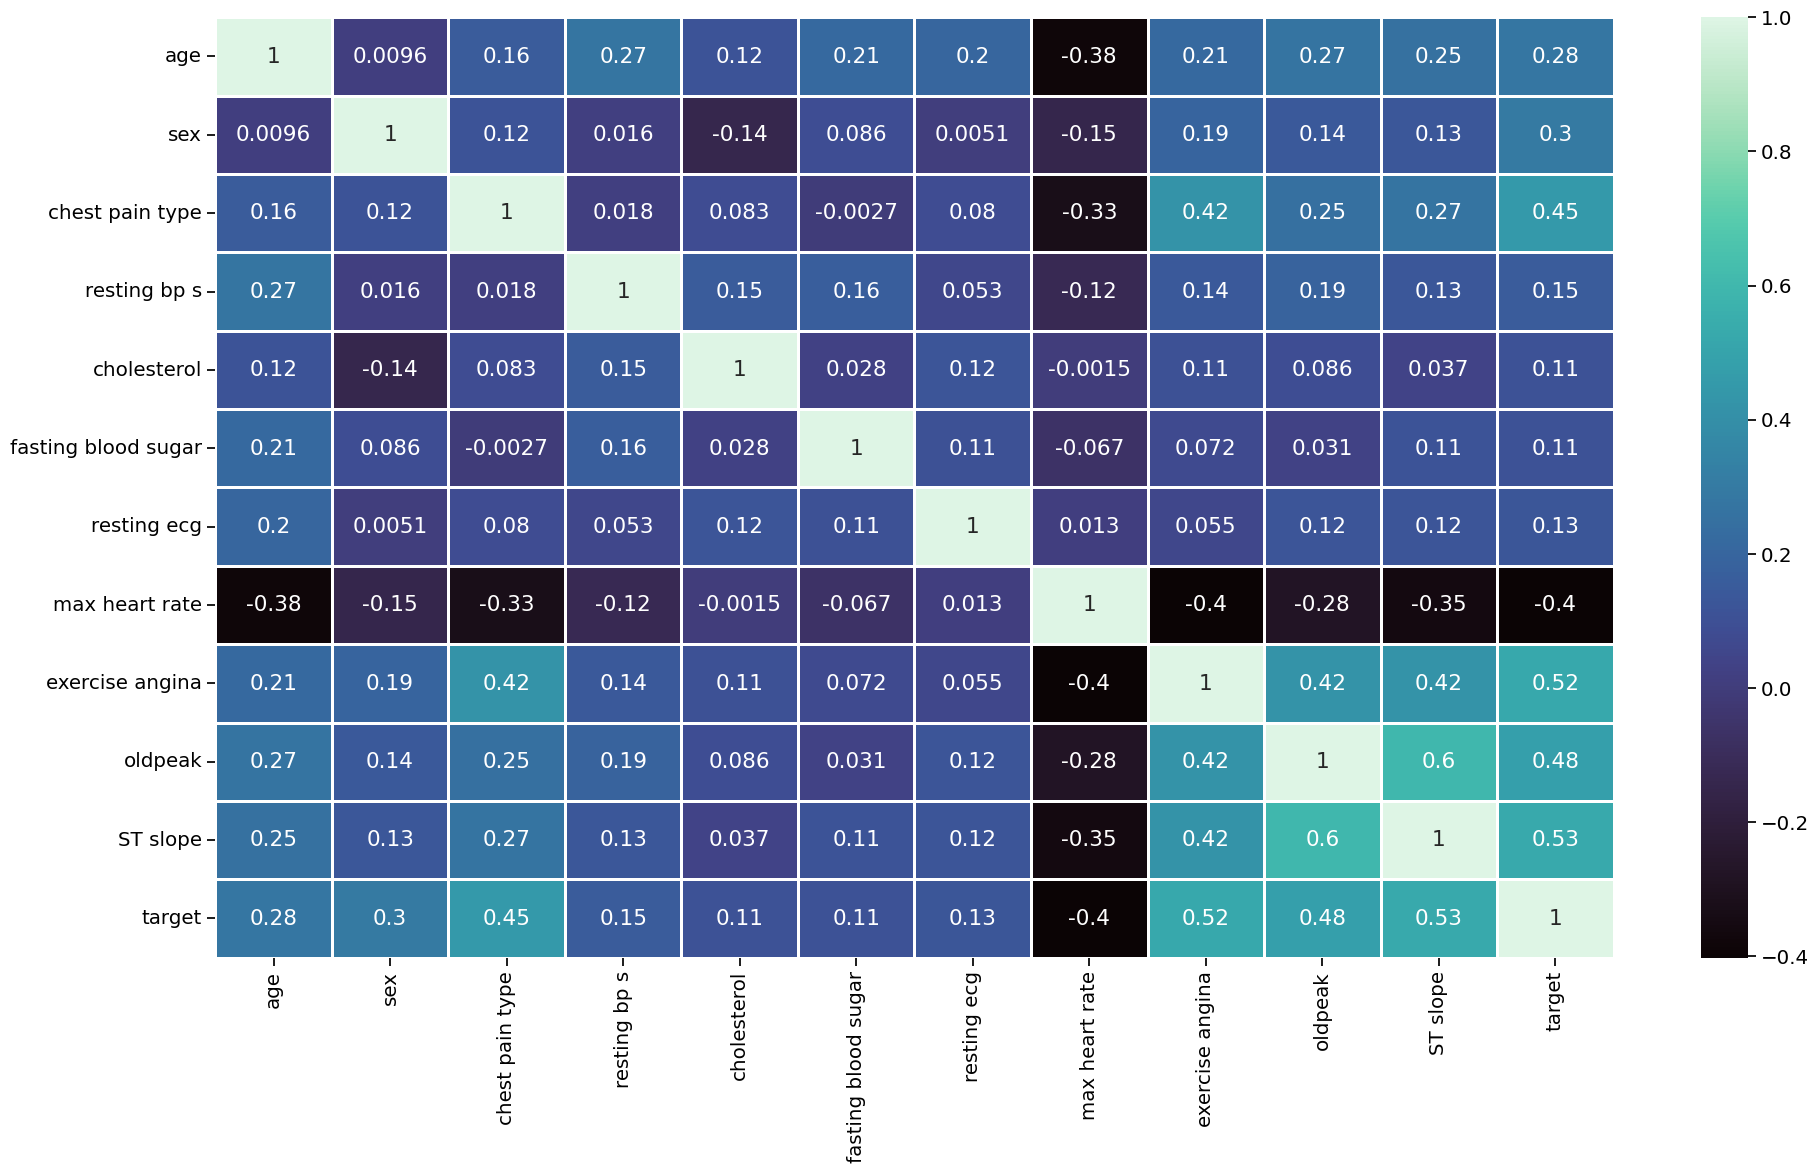

In [56]:
plt.figure(figsize=(20,12))
sns.set_context('notebook', font_scale = 1.3)
sns.heatmap(df_dropped.corr(), annot=True, linewidth =2, cmap='mako')
plt.tight_layout()

This correlation heatmap belongs to our 'dropped_df' dataset which is new dataset induced (by dropping invalid values) from original dataset. <br>
Most correlated features :<br>
ST slope <br>
Exercise angina <br>
Oldpeak <br>
Chest pain type<br>
Max heart rate <br><br>
Least correlated features :<br>
Cholesterol<br>
Fasting blood sugar <br>
Restin ecg <br>
Resting bp s <br>
Age <br>
Sex<br>

It can be said that these results supports our comments and analysis about graphs of attributes. 

### Preparing the variables to model

In [57]:
scaler = MinMaxScaler()
num = ['age', 'resting bp s', 'cholesterol', 'max heart rate','oldpeak']
scaled = scaler.fit_transform(df_dropped[num])
df_dropped[num] = scaled
X = df_dropped.iloc[:,:-1]
X.head()

age  sex  chest pain type  resting bp s  cholesterol  \
0  0.244898    1                2      0.545455     0.614458   
1  0.428571    0                3      0.772727     0.286145   
2  0.183673    1                2      0.431818     0.596386   
3  0.408163    0                4      0.522727     0.388554   
4  0.530612    1                3      0.659091     0.331325   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0            0        0.770992                0   
1                    0            0        0.648855                0   
2                    0            1        0.206107                0   
3                    0            0        0.282443                1   
4                    0            0        0.389313                0   

    oldpeak  ST slope  
0  0.023256         1  
1  0.255814         2  
2  0.023256         1  
3  0.372093         2  
4  0.023256         1

In [58]:
y = df_dropped.iloc[:,-1]
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 995, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

Since this is a classification problem, we decide using logistic regression, support vector machine classifier, K-nearest neighbour and random forest classifier models.

In [60]:
def Models(model, X_train, X_test, y_train, y_test): # the function to run our models
    if model == 'LR':
        model = LogisticRegression()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
    elif model == 'SVC':
        model = SVC()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
    elif model == 'KNN':
        model = KNeighborsClassifier()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
    elif model == 'RF':
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))

In [61]:
def Cross(model, X, y): # the function to do cross-validiation of model
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_score = cross_val_score(model, X, y, cv=cv)
    cv_score_mean = format(100*cv_score.mean(), '.2f')
    return float(cv_score_mean)

### Logistic Regression

In [62]:
Models('LR', X_train, X_test, y_train, y_test)

[[106  32]
 [ 21  90]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       138
           1       0.74      0.81      0.77       111

    accuracy                           0.79       249
   macro avg       0.79      0.79      0.79       249
weighted avg       0.79      0.79      0.79       249



In [63]:
param_LR = {'max_iter': [10, 100, 1000],  
              'tol': [1, 0.1, 0.01, 0.001, 0.0001],
              'solver':['liblinear', 'newton-cg','lbfgs']}  
grid = GridSearchCV(LogisticRegression(), param_LR, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train)  
# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_iter': 10, 'solver': 'newton-cg', 'tol': 0.1}


We will be using this (GridSearchCV) hyperparameter tuning method to obtain best parameters for models during the project. After this process, we run the model again with these best parameters. Then we will compare results by looking at the confusion matrix, classification report, roc curve and cross validation'scores.

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       138
           1       0.74      0.81      0.77       111

    accuracy                           0.79       249
   macro avg       0.79      0.79      0.79       249
weighted avg       0.79      0.79      0.79       249



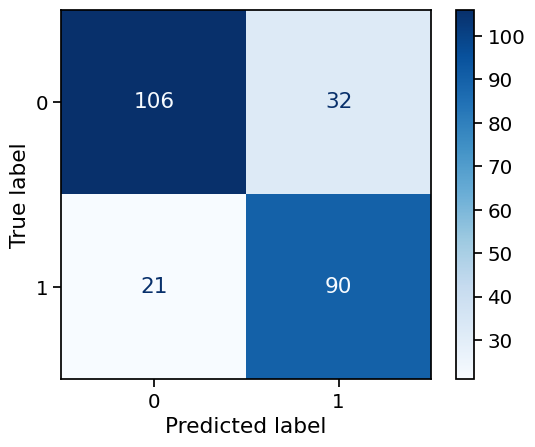

In [64]:
best_LR = LogisticRegression(max_iter=10, tol=0.1, solver='newton-cg')
best_LR.fit(X_train, y_train)
LR_pred = best_LR.predict(X_test)
plot_confusion_matrix(best_LR, X_test, y_test,
                     cmap=plt.cm.Blues)
print(classification_report(y_test, y_pred=LR_pred))

Text(0, 0.5, 'True Positive')

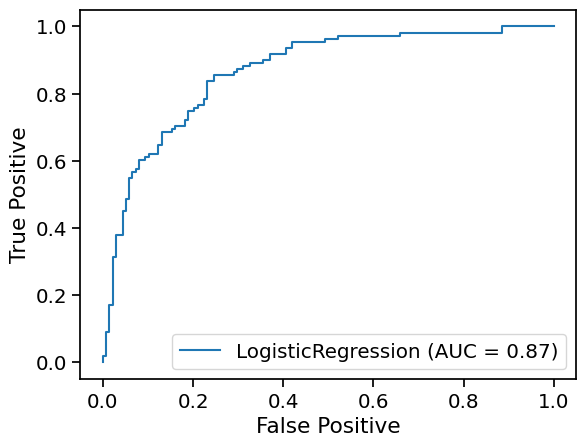

In [66]:
plot_roc_curve(best_LR, X_test, y_test)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [67]:
avg_acc_LR = Cross(best_LR, X, y)
avg_acc_LR

82.51

### Support Vector Machine

In [68]:
Models('SVC', X_train, X_test, y_train, y_test)

[[109  29]
 [ 22  89]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       138
           1       0.75      0.80      0.78       111

    accuracy                           0.80       249
   macro avg       0.79      0.80      0.79       249
weighted avg       0.80      0.80      0.80       249



In [69]:
# defining parameter range 
param_SVC = {'C': [0.1, 1, 10, 100],  
              'tol': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'sigmoid']}  
   
grid = GridSearchCV(SVC(), param_SVC, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.01}


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       138
           1       0.80      0.82      0.81       111

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.83      0.83      0.83       249



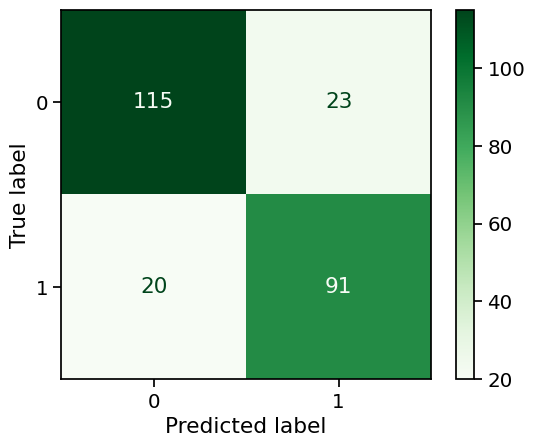

In [70]:
best_SVC = SVC(C=100, gamma='scale', kernel='rbf', tol=0.01)
best_SVC.fit(X_train, y_train)
SVC_pred = best_SVC.predict(X_test)
plot_confusion_matrix(best_SVC, X_test, y_test,
                     cmap=plt.cm.Greens)
print(classification_report(y_test, y_pred=SVC_pred))

Text(0, 0.5, 'True Positive')

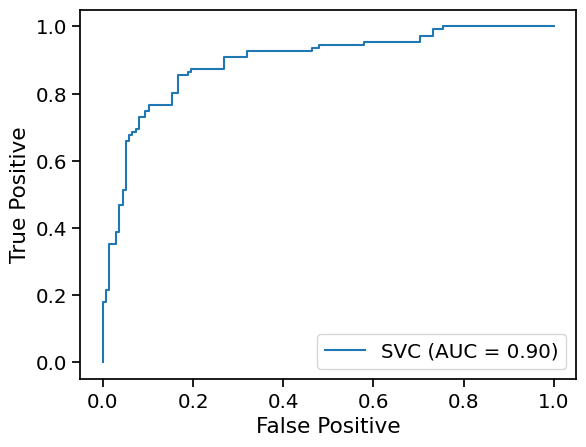

In [71]:
plot_roc_curve(best_SVC, X_test, y_test)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [72]:
avg_acc_SVC = Cross(best_SVC, X, y)
avg_acc_SVC

86.63

### K Nearest Neighborhood

In [73]:
Models('KNN', X_train, X_test, y_train, y_test)

[[113  25]
 [ 18  93]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       138
           1       0.79      0.84      0.81       111

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.83      0.83      0.83       249



In [74]:
param_KNN = {'metric':['minkowski', 'euclidian', 'manhattan'],'n_neighbors': [3, 5, 7,9 ,11, 13], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_KNN, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       138
           1       0.89      0.91      0.90       111

    accuracy                           0.91       249
   macro avg       0.91      0.91      0.91       249
weighted avg       0.91      0.91      0.91       249



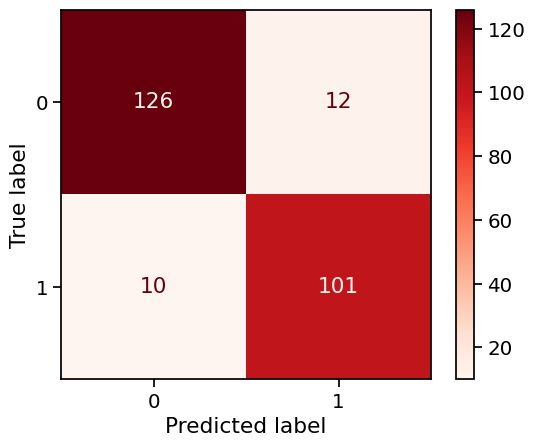

In [75]:
best_KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
best_KNN.fit(X_train, y_train)
KNN_pred = best_KNN.predict(X_test)
plot_confusion_matrix(best_KNN, X_test, y_test,
                     cmap=plt.cm.Reds)
print(classification_report(y_test, y_pred=KNN_pred))

Text(0, 0.5, 'True Positive')

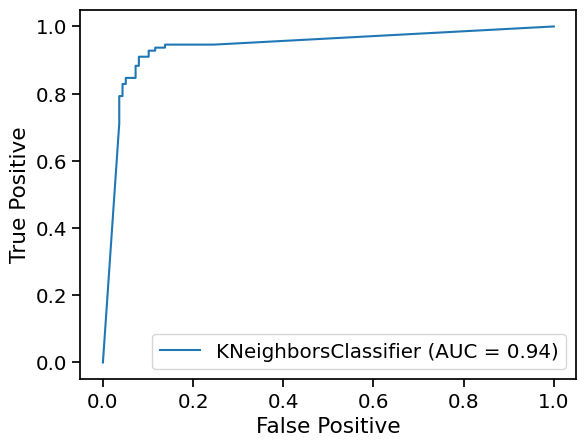

In [76]:
plot_roc_curve(best_KNN, X_test, y_test)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [77]:
avg_acc_KNN = Cross(best_KNN, X, y)
avg_acc_KNN

93.17

### Random Forest

In [102]:
Models('RF', X_train, X_test, y_train, y_test)

[[126  12]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       138
           1       0.90      0.93      0.91       111

    accuracy                           0.92       249
   macro avg       0.92      0.92      0.92       249
weighted avg       0.92      0.92      0.92       249



In [83]:
param_RF = {'n_estimators': [10, 25, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, 20, 25, 30, 35, 40], 'min_samples_leaf': [1, 2, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_RF, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       138
           1       0.93      0.94      0.93       111

    accuracy                           0.94       249
   macro avg       0.94      0.94      0.94       249
weighted avg       0.94      0.94      0.94       249



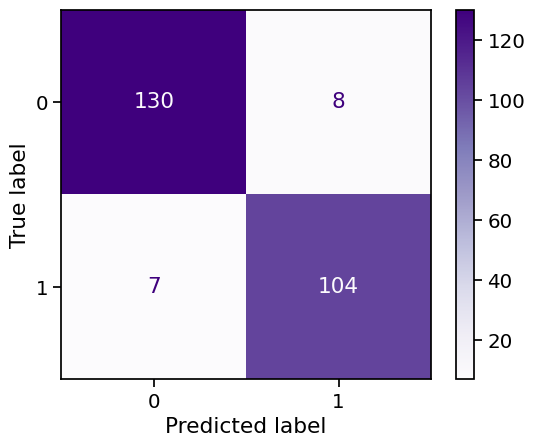

In [122]:
best_RF = RandomForestClassifier(criterion='gini', max_depth=30, min_samples_leaf=1, n_estimators=50)
best_RF.fit(X_train, y_train)
RF_pred = best_RF.predict(X_test)
plot_confusion_matrix(best_RF, X_test, y_test,
                     cmap=plt.cm.Purples)
print(classification_report(y_test, y_pred=RF_pred))

Text(0, 0.5, 'True Positive')

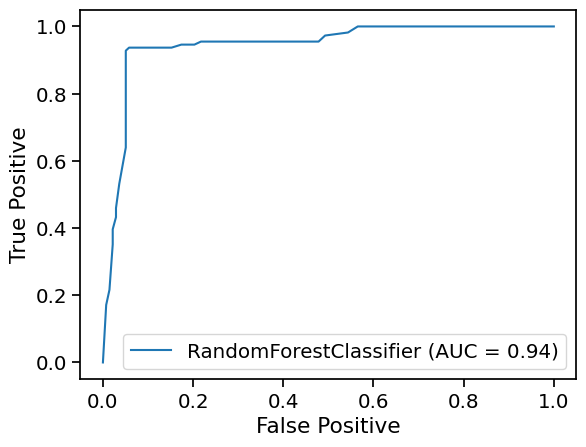

In [123]:
plot_roc_curve(best_RF, X_test, y_test)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [183]:
avg_acc_RF = Cross(best_RF, X, y)
avg_acc_RF

93.37

### 3.2 Preapering data to model with interpolation

In [125]:
inter_df = df.copy()
inter_df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [126]:
inter_df[inter_df['ST slope']==0] 

age  sex  chest pain type  resting bp s  cholesterol  \
517   68    1                3           150          195   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
517                    1            0             132                0   

     oldpeak  ST slope  target  
517      0.0         0       1

In [127]:
inter_df['ST slope'].loc[517] = np.nan
inter_df['ST slope'].loc[517]

nan

In [128]:
inter_df['ST slope'] = inter_df['ST slope'].interpolate()

In [129]:
temp = inter_df[inter_df['cholesterol'] == 0].index.tolist()
inter_df['cholesterol'].loc[temp] = np.nan
inter_df['cholesterol'] = inter_df['cholesterol'].interpolate()

In [130]:
inter_df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Now, all the invalid values of 'St slope' and 'Cholesterol' interpolated. This was done by changing these values to 'Nan' and then interpolation.

In [131]:
outlier_total_ind = (outlierDetection(inter_df,'cholesterol')
+outlierDetection(inter_df,'age')
+outlierDetection(inter_df,'resting bp s')
+outlierDetection(inter_df,'ST slope')
+outlierDetection(inter_df,'max heart rate'))
outlier_total_ind = list(np.unique(outlier_total_ind))
len(outlier_total_ind)

28

There ara 28 outliers to be dropped of new interpolated dataset.

In [132]:
inter_df.drop(index=outlier_total_ind, inplace = True)
inter_df.shape #final shape

(1162, 12)

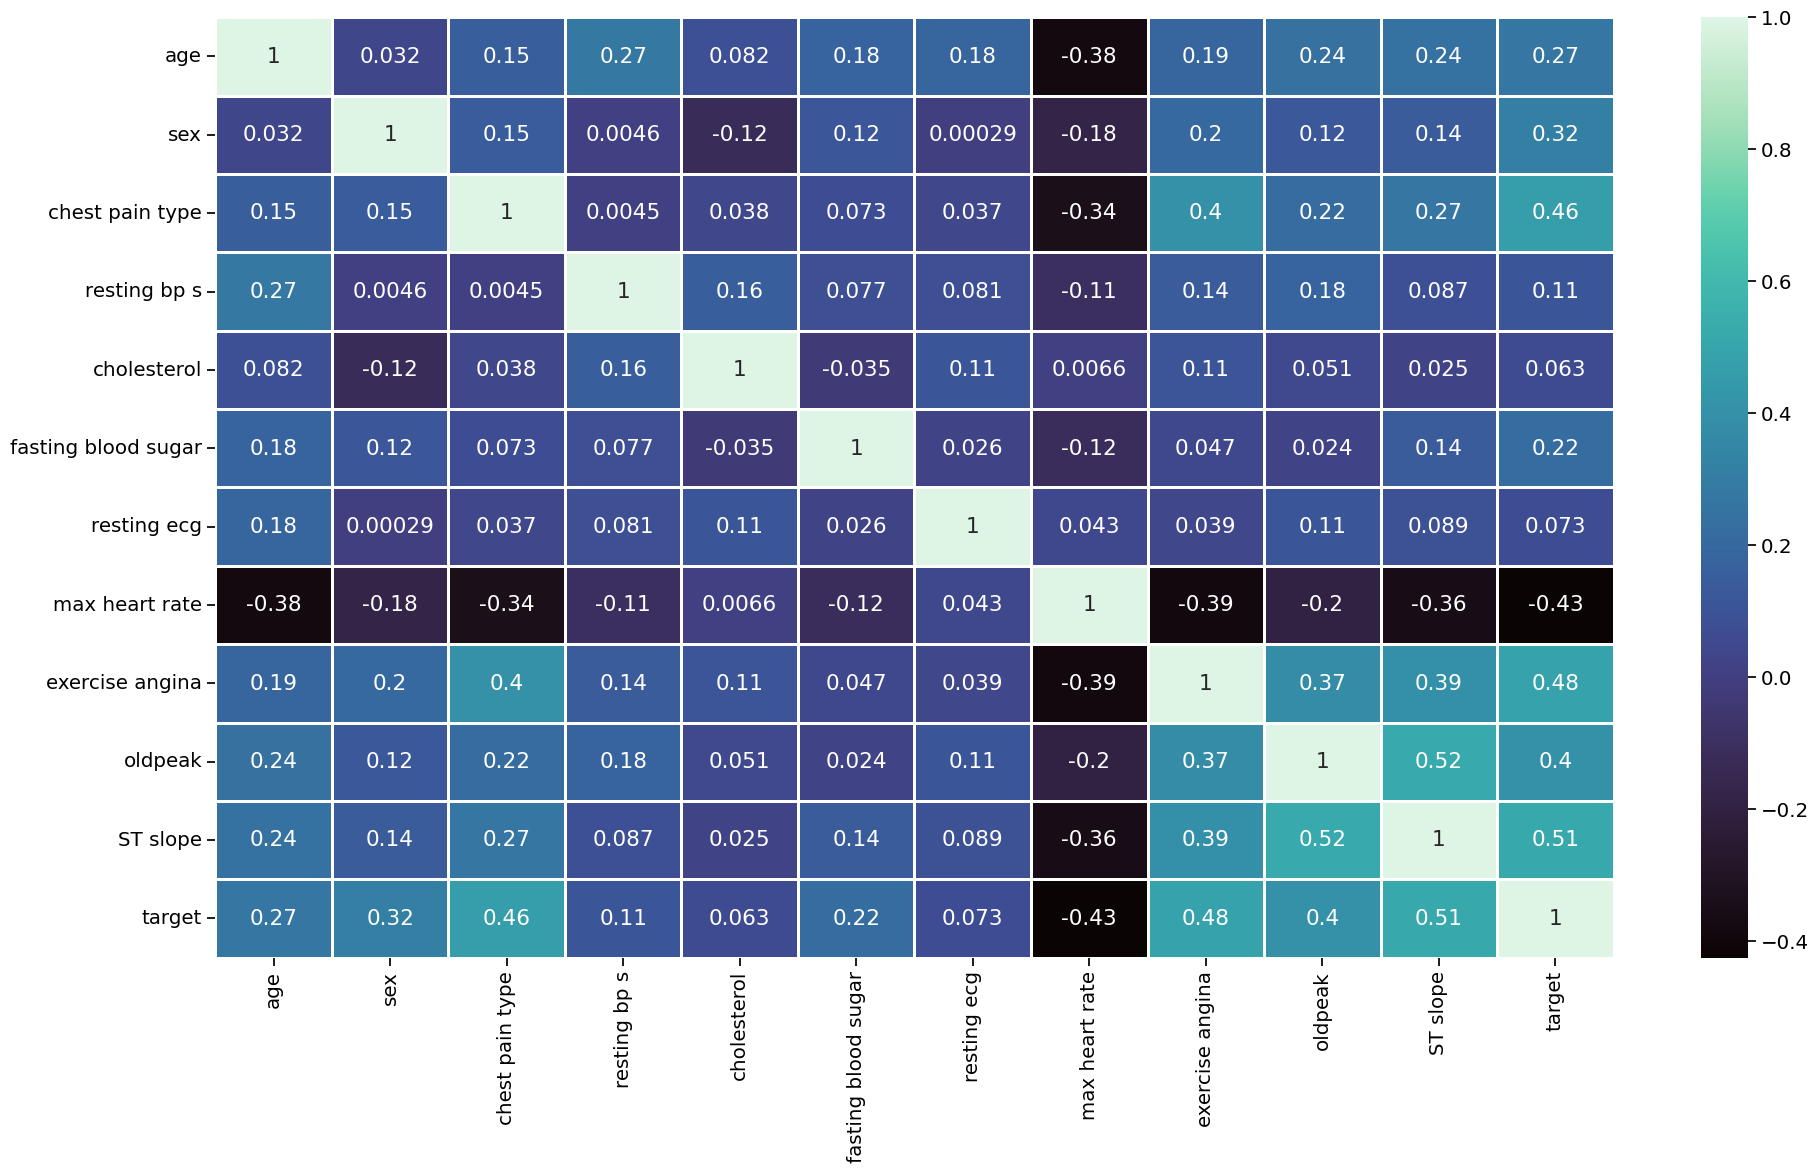

In [133]:
plt.figure(figsize=(20,12))
sns.set_context('notebook', font_scale = 1.3)
sns.heatmap(inter_df.corr(), annot=True, linewidth =2, cmap='mako')
plt.tight_layout()

### Preparing the  variables to model

In [134]:
scaler = MinMaxScaler()
num = ['age', 'resting bp s', 'cholesterol', 'max heart rate','oldpeak']
scaled = scaler.fit_transform(inter_df[num])
inter_df[num] = scaled
inter_X = inter_df.iloc[:,:-1]
inter_X.head()

age  sex  chest pain type  resting bp s  cholesterol  \
0  0.244898    1                2      0.571429     0.639498   
1  0.428571    0                3      0.761905     0.297806   
2  0.183673    1                2      0.476190     0.620690   
3  0.408163    0                4      0.552381     0.404389   
4  0.530612    1                3      0.666667     0.344828   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0            0        0.777778                0   
1                    0            0        0.659259                0   
2                    0            1        0.229630                0   
3                    0            0        0.303704                1   
4                    0            0        0.407407                0   

    oldpeak  ST slope  
0  0.295455       1.0  
1  0.409091       2.0  
2  0.295455       1.0  
3  0.465909       2.0  
4  0.295455       1.0

In [135]:
inter_y = inter_df.iloc[:,-1]
inter_y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1162, dtype: int64

In [136]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inter_X, inter_y, random_state=104, test_size=0.25, shuffle=True)

### Logistic Regression

In [137]:
Models('LR', X_train2, X_test2, y_train2, y_test2)

[[112  21]
 [ 27 131]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       133
           1       0.86      0.83      0.85       158

    accuracy                           0.84       291
   macro avg       0.83      0.84      0.83       291
weighted avg       0.84      0.84      0.84       291



In [138]:
param_LR2 = {'max_iter': [10, 100, 1000], 'tol': [1, 0.1, 0.01, 0.001, 0.0001], 'solver':['liblinear', 'newton-cg','lbfgs']}  
grid = GridSearchCV(LogisticRegression(), param_LR2, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train)  
# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_iter': 10, 'solver': 'newton-cg', 'tol': 0.1}


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       133
           1       0.86      0.83      0.85       158

    accuracy                           0.84       291
   macro avg       0.83      0.84      0.83       291
weighted avg       0.84      0.84      0.84       291



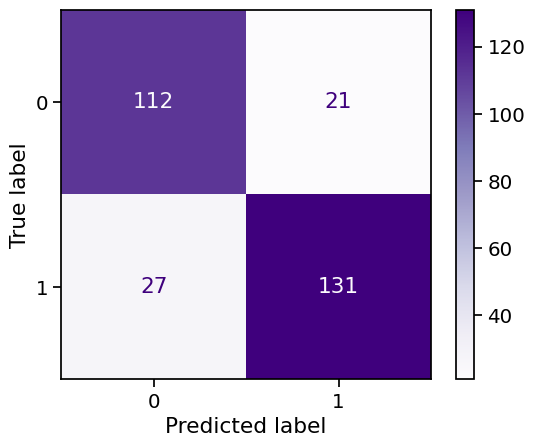

In [139]:
best_LR2 = LogisticRegression(max_iter=10, tol=0.1, solver='newton-cg')
best_LR2.fit(X_train2, y_train2)
LR2_pred = best_LR2.predict(X_test2)
plot_confusion_matrix(best_LR2, X_test2, y_test2,
                     cmap=plt.cm.Purples)
print(classification_report(y_test2, y_pred=LR2_pred))

Text(0, 0.5, 'True Positive')

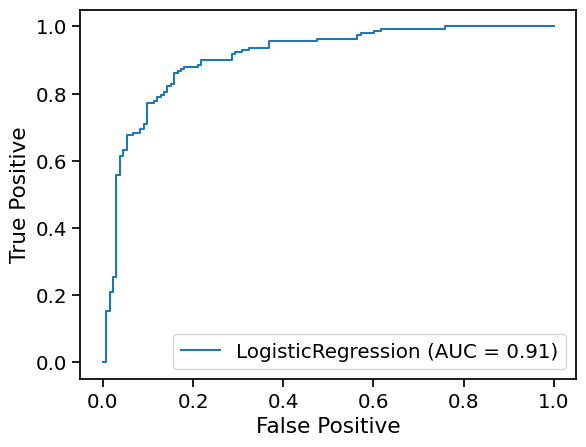

In [140]:
plot_roc_curve(best_LR2, X_test2, y_test2)
plt.xlabel('False Positive')
plt.ylabel('True Positive')


In [141]:
avg_acc_LR2 = Cross(best_LR2, inter_X, inter_y)
avg_acc_LR2

83.48

### Support Vector Machine

In [142]:
Models('SVC', X_train2, X_test2, y_train2, y_test2)

[[115  18]
 [ 23 135]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       133
           1       0.88      0.85      0.87       158

    accuracy                           0.86       291
   macro avg       0.86      0.86      0.86       291
weighted avg       0.86      0.86      0.86       291



In [143]:
# defining parameter range 
param_SVC2 = {'C': [0.1, 1, 10, 100],  
              'tol': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'sigmoid']}  
   
grid = GridSearchCV(SVC(), param_SVC2, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train2, y_train2) 
 
# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 1}


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       133
           1       0.85      0.87      0.86       158

    accuracy                           0.85       291
   macro avg       0.84      0.84      0.84       291
weighted avg       0.85      0.85      0.85       291



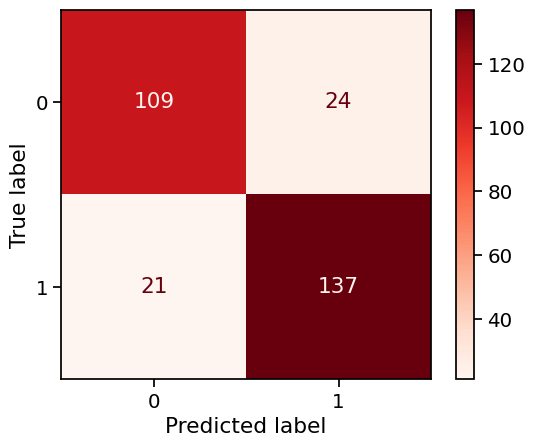

In [144]:
best_SVC2 = SVC(C=100, gamma='auto', kernel='rbf', tol=1)
best_SVC2.fit(X_train2, y_train2)
SVC2_pred = best_SVC2.predict(X_test2)
plot_confusion_matrix(best_SVC2, X_test2, y_test2,
                     cmap=plt.cm.Reds)
print(classification_report(y_test2, y_pred=SVC2_pred))

Text(0, 0.5, 'True Positive')

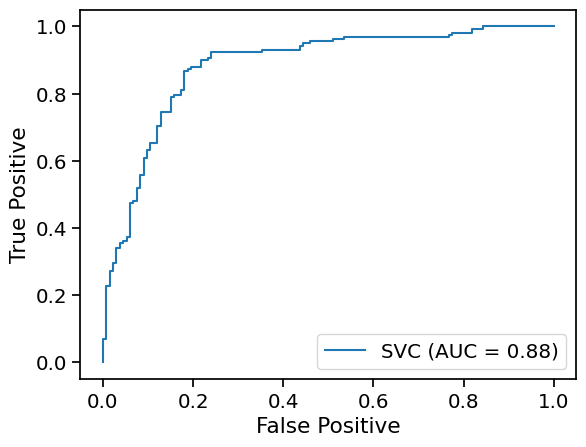

In [145]:
plot_roc_curve(best_SVC2, X_test2, y_test2)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [146]:
avg_acc_SVC2 = Cross(best_SVC2, inter_X, inter_y)
avg_acc_SVC2

85.8

### K Nearest Neighboor

In [147]:
Models('KNN', X_train2, X_test2, y_train2, y_test2)

[[110  23]
 [ 19 139]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       133
           1       0.86      0.88      0.87       158

    accuracy                           0.86       291
   macro avg       0.86      0.85      0.85       291
weighted avg       0.86      0.86      0.86       291



In [148]:
param_KNN2 = {'metric':['minkowski', 'euclidian', 'manhattan'],'n_neighbors': [3, 5, 7,9 ,11, 13], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_KNN2, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train2, y_train2) 
 
# print best parameter after tuning 
print(grid.best_params_)  

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       133
           1       0.92      0.93      0.93       158

    accuracy                           0.92       291
   macro avg       0.92      0.92      0.92       291
weighted avg       0.92      0.92      0.92       291



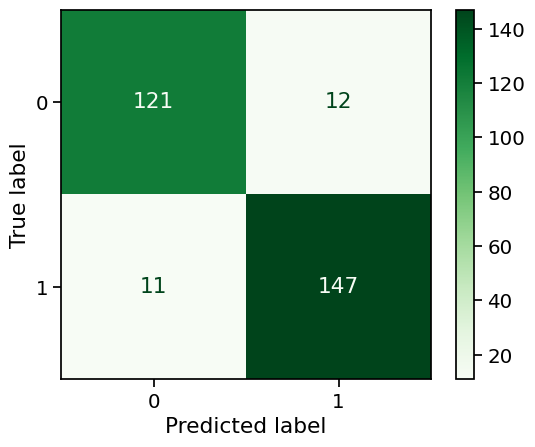

In [149]:
best_KNN2 = KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')
best_KNN2.fit(X_train2, y_train2)
KNN2_pred = best_KNN2.predict(X_test2)
plot_confusion_matrix(best_KNN2, X_test2, y_test2,
                     cmap=plt.cm.Greens)
print(classification_report(y_test2, y_pred=KNN2_pred))

Text(0, 0.5, 'True Positive')

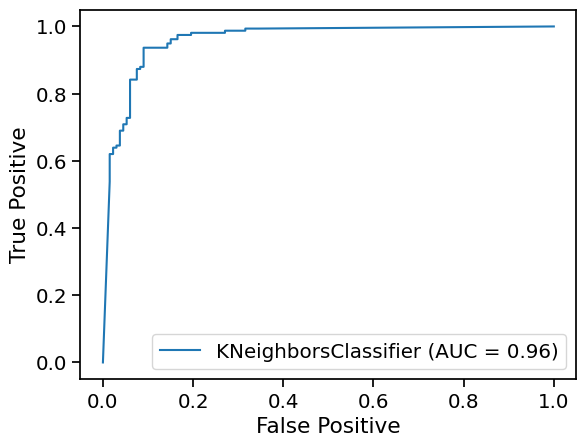

In [150]:
plot_roc_curve(best_KNN2, X_test2, y_test2)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [151]:
avg_acc_KNN2 = Cross(best_KNN2, inter_X, inter_y)
avg_acc_KNN2

92.08

### Random Forest

In [152]:
Models('RF', X_train2, X_test2, y_train2, y_test2)

[[120  13]
 [ 10 148]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       133
           1       0.92      0.94      0.93       158

    accuracy                           0.92       291
   macro avg       0.92      0.92      0.92       291
weighted avg       0.92      0.92      0.92       291



In [153]:
param_RF2 = {'n_estimators': [10, 25, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, 20, 25, 30, 35, 40], 'min_samples_leaf': [1, 2, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_RF2, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train2, y_train2) 
 
# print best parameter after tuning 
print(grid.best_params_) 

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.93      0.93      0.93       158

    accuracy                           0.92       291
   macro avg       0.92      0.92      0.92       291
weighted avg       0.92      0.92      0.92       291



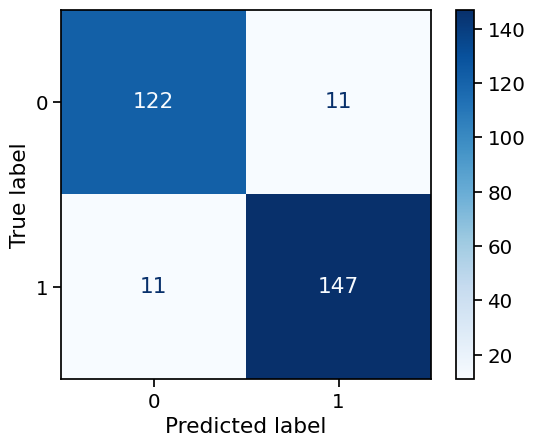

In [154]:
best_RF2 = RandomForestClassifier(criterion='gini', max_depth=25, min_samples_leaf=1, n_estimators=200)
best_RF2.fit(X_train2, y_train2)
RF2_pred = best_RF2.predict(X_test2)
plot_confusion_matrix(best_RF2, X_test2, y_test2,
                     cmap=plt.cm.Blues)
print(classification_report(y_test2, y_pred=RF2_pred))

Text(0, 0.5, 'True Positive')

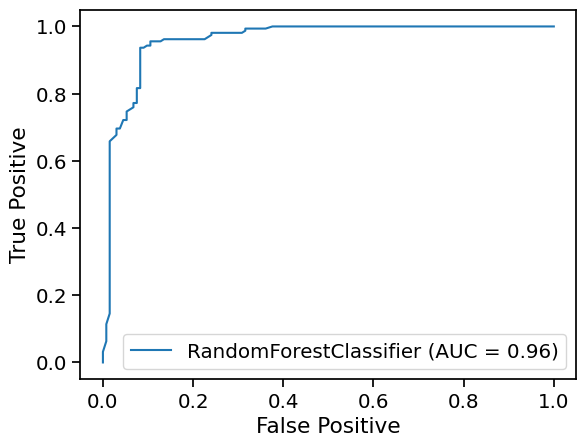

In [155]:
plot_roc_curve(best_RF2, X_test2, y_test2)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

In [156]:
avg_acc_RF2 = Cross(best_RF2, inter_X, inter_y)
avg_acc_RF2

92.6

## 4. Deciding best model and conclusion

In [230]:
accuracies = [{"LR (ELSEVIER 1989)": 77.0,
              "ANN+SVM+MLP(IEEE 2010)": 80.41,
              "ANN+VQA (IEEE 2011)": 80.0,
              "ANN+GA+BPNN (IEEE 2013)": 89.0,
              "DT+SVO+NB (IEEE 2014)": 82.0,
              "ANN+VQA (IEEE 2014)": 85.55,
              "ANN+MLP+BPNN (IEEE 2014)": 98.0,
              "ANN+BPNN (IEEE 2017)": 95.0,
              "RFNN (ELSEVIER 2017)": 96.63,
              "DNN (TANDF 2020)": 98.15,
              "LR (Ours with dropping invalid values)": avg_acc_LR,
              "SVM (Ours with dropping invalid values)": avg_acc_SVC,
              "KNN (Ours with dropping invalid values)": avg_acc_KNN,
              "RF (Ours with dropping invalid values)": avg_acc_RF,
              "LR (Ours with interpolation)": avg_acc_LR2,
              "SVM (Ours with interpolation)": avg_acc_SVC2,
              "KNN (Ours with interpolation)": avg_acc_KNN2,
              "RF (Ours with interpolation)": avg_acc_RF2}]
acc_df = pd.DataFrame.from_dict(accuracies)
acc_df = acc_df.T
acc_df

0
LR (ELSEVIER 1989)                       77.00
ANN+SVM+MLP(IEEE 2010)                   80.41
ANN+VQA (IEEE 2011)                      80.00
ANN+GA+BPNN (IEEE 2013)                  89.00
DT+SVO+NB (IEEE 2014)                    82.00
ANN+VQA (IEEE 2014)                      85.55
ANN+MLP+BPNN (IEEE 2014)                 98.00
ANN+BPNN (IEEE 2017)                     95.00
RFNN (ELSEVIER 2017)                     96.63
DNN (TANDF 2020)                         98.15
LR (Ours with dropping invalid values)   82.51
SVM (Ours with dropping invalid values)  86.63
KNN (Ours with dropping invalid values)  93.17
RF (Ours with dropping invalid values)   93.37
LR (Ours with interpolation)             83.48
SVM (Ours with interpolation)            85.80
KNN (Ours with interpolation)            92.08
RF (Ours with interpolation)             92.60

In [231]:
acc_df.rename(columns={0:'Accuracies of Models'},inplace=True)

In [232]:
sorted_acc = pd.DataFrame(acc_df.sort_values(by = 'Accuracies of Models').iloc[:,0])
sorted_acc

Accuracies of Models
LR (ELSEVIER 1989)                                      77.00
ANN+VQA (IEEE 2011)                                     80.00
ANN+SVM+MLP(IEEE 2010)                                  80.41
DT+SVO+NB (IEEE 2014)                                   82.00
LR (Ours with dropping invalid values)                  82.51
LR (Ours with interpolation)                            83.48
ANN+VQA (IEEE 2014)                                     85.55
SVM (Ours with interpolation)                           85.80
SVM (Ours with dropping invalid values)                 86.63
ANN+GA+BPNN (IEEE 2013)                                 89.00
KNN (Ours with interpolation)                           92.08
RF (Ours with interpolation)                            92.60
KNN (Ours with dropping invalid values)                 93.17
RF (Ours with dropping invalid values)                  93.37
ANN+BPNN (IEEE 2017)                                    95.00
RFNN (ELSEVIER 2017)                                    96.63
ANN+MLP+BPNN (IEEE 2014)                                98.00
DNN (TANDF 2020)                                        98.15

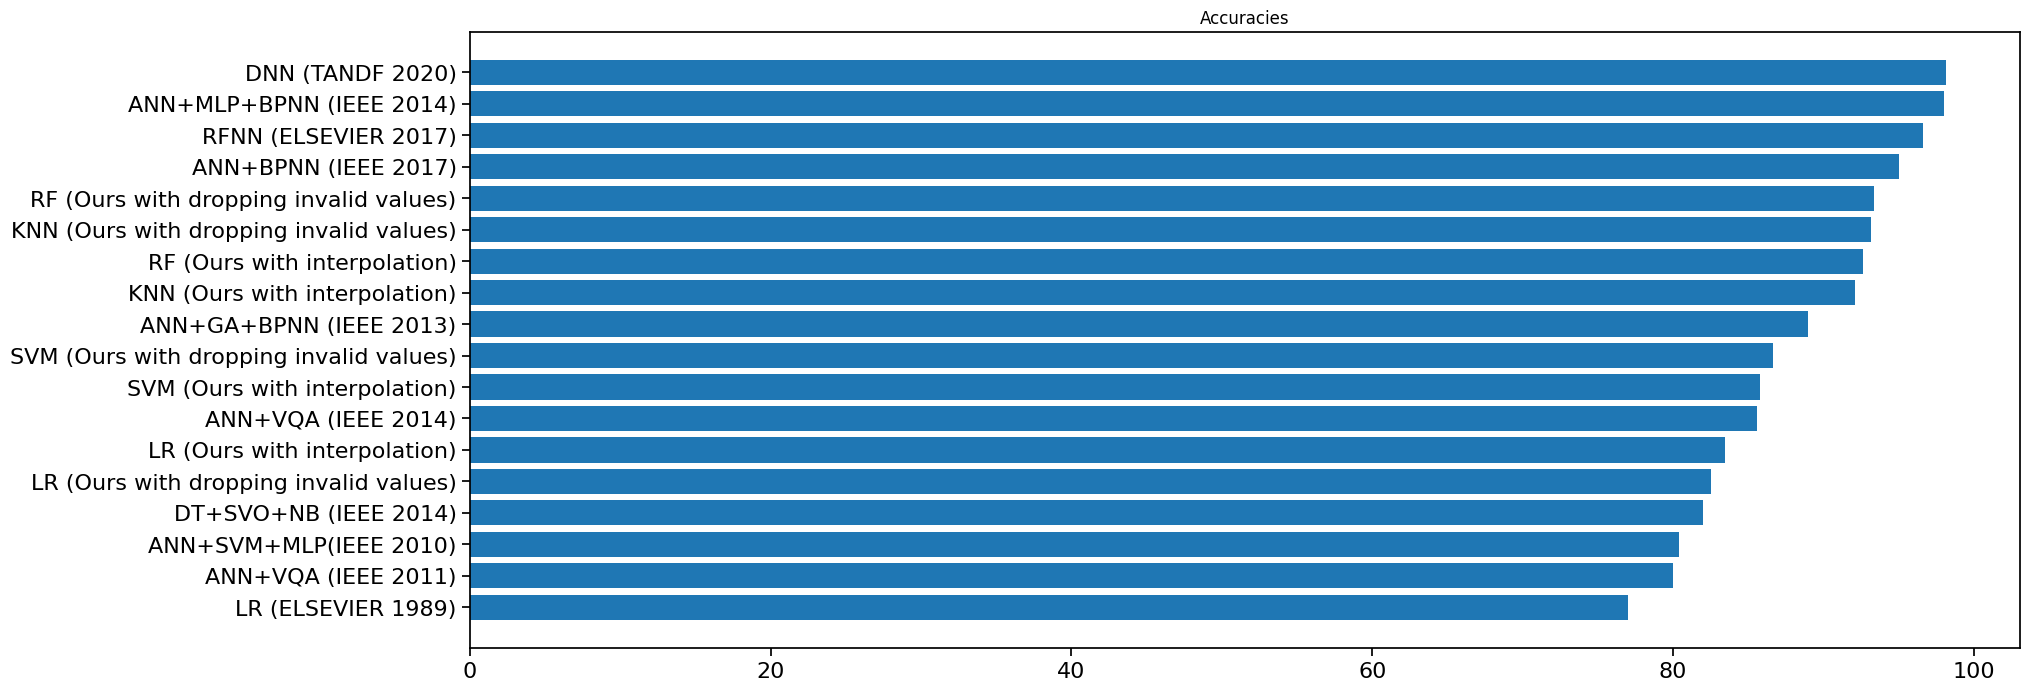

In [233]:
plt.figure(figsize=(20,8))
plt.barh(sorted_acc.index, sorted_acc['Accuracies of Models'])
plt.title("Accuracies")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

According to cross validation results, the random forest model we created by dropping invalid values and outliers is the most accurate model among our models. KNN is so close to random forest, but we investigate our random forest model. Except logistic regression model, models created by dropping invalid values are  more accurate.

In [188]:
importance = best_RF.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07279
Feature: 1, Score: 0.04028
Feature: 2, Score: 0.12555
Feature: 3, Score: 0.07196
Feature: 4, Score: 0.07769
Feature: 5, Score: 0.01228
Feature: 6, Score: 0.03089
Feature: 7, Score: 0.11930
Feature: 8, Score: 0.12393
Feature: 9, Score: 0.13578
Feature: 10, Score: 0.18955


In random forest, this is the impotance scores of every feature that we have.

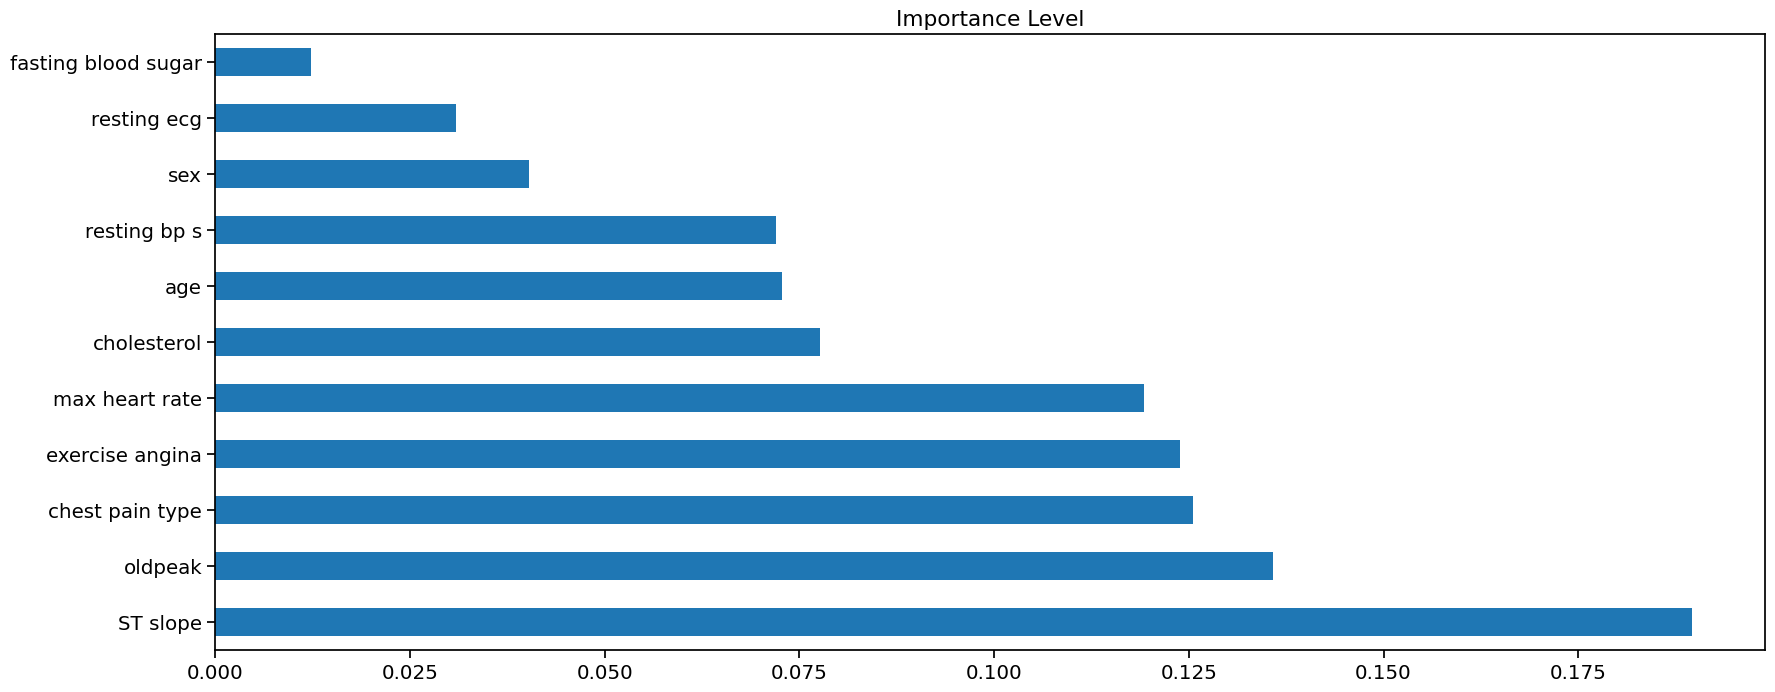

In [189]:
index= df_dropped.columns[:-1]
importance = pd.Series(best_RF.feature_importances_, index=index)

plt.figure(figsize=(20,8))
importance.nlargest(11).plot(kind='barh')
plt.title("Importance Level")
plt.show()

This results is not surprising, since we expected that 'max heart rate', 'exercise angina', 'chest pain type', 'chest pain type', 'oldpeak' and 'ST slope' is most effective features in diagnosing heart disease. Because in these features, the values are more distinguishable between the people wiht heart disease and people without heart disease. 

At the beginning of the project, our aim was to create a model for heart disease prediction that is close to the cheaper machine learning models we learned in the course and the high-success models studied with the neural network. We have achieved sufficient accuracy rate with cheaper models such as random forest and k-nearest neighbour models.

### Distributions of Roles <br>
First, we want to specify that everyone has involved every part of the project.<br>
After first detection of invalid values and outliers, we discussed and did everything together.<br>
Here is the distribution:<br>
Visualizing | Samet Saydam<br>
Exploring and Analizing Data | Samet Saydam & Utku Sert & Ahmet Erden<br>
Handling with Outliers and Invalid Values | Utku Sert & Ahmet Erden <br>
Interpolation | Utku Sert<br>
Model Creation | Samet Saydam & Utku Sert & Ahmet Erden<br>
Hyperparameter Tuning | Ahmet Erden<br>
Model Analysis and Comparison | Samet Saydam & Utku Sert & Ahmet Erden<br>
Final Checks and Editing |  Samet Saydam & Utku Sert & Ahmet Erden<br>